<a href="https://colab.research.google.com/github/awi-ellie/awi-ellie/blob/main/CHE_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd


'/content'

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
from google.colab import files
uploaded = files.upload()

Saving all_players_stats.csv to all_players_stats.csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(uploaded["all_players_stats.csv"]))
#Data importation

In [7]:
df

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,Arsenal,7,Bukayo Saka,Defender/Midfielder,40,3,12,2,6.0,0.0
1,Arsenal,6,Gabriel,Defender,37,1,5,0,7.0,1.0
2,Arsenal,32,Aaron Ramsdale,Goalkeeper,37,0,0,0,1.0,0.0
3,Arsenal,4,Ben White,Defender,37,0,0,0,3.0,0.0
4,Arsenal,8,Martin Odegaard,Midfielder,36,4,7,0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
618,Wolverhampton Wanderers,21,John Ruddy,Goalkeeper,5,1,0,0,0.0,0.0
619,Wolverhampton Wanderers,27,Romain Saïss,Defender/Midfielder,32,0,3,0,6.0,0.0
620,Wolverhampton Wanderers,24,Tote Gomes,Defender,5,0,0,0,1.0,0.0
621,Wolverhampton Wanderers,37,Adama Traoré,Midfielder/Forward,11,12,1,0,0.0,0.0


Exploratory Data Analysis (EDA)

In [9]:
df.dtypes


Team              object
JerseyNo           int64
Player            object
Position          object
Apearances         int64
Substitutions      int64
Goals              int64
Penalties          int64
YellowCards      float64
RedCards         float64
dtype: object

In [10]:
df.shape

(623, 10)

In [11]:
df.isnull().sum()

Team             0
JerseyNo         0
Player           0
Position         0
Apearances       0
Substitutions    0
Goals            0
Penalties        0
YellowCards      0
RedCards         0
dtype: int64

In [12]:
df.notnull().sum()

Team             623
JerseyNo         623
Player           623
Position         623
Apearances       623
Substitutions    623
Goals            623
Penalties        623
YellowCards      623
RedCards         623
dtype: int64

In [13]:
df.nunique()

Team              20
JerseyNo          82
Player           613
Position           8
Apearances        54
Substitutions     25
Goals             24
Penalties          9
YellowCards       13
RedCards           3
dtype: int64

In [14]:
Chelsea = df.query("Team == 'Chelsea'")

In [15]:
Chelsea.head()

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
155,Chelsea,28,César Azpilicueta,Defender/Midfielder,41,6,3,0,4.0,0.0
156,Chelsea,34,Lewis Baker,Midfielder,0,1,0,0,0.0,0.0
157,Chelsea,18,Ross Barkley,Midfielder,4,10,1,0,0.0,0.0
158,Chelsea,13,Marcus Bettinelli,Goalkeeper,1,0,0,0,0.0,0.0
159,Chelsea,14,Trevoh Chalobah,Defender,24,6,4,0,3.0,0.0


In [16]:
Chelsea.groupby("Player"). Goals.sum()

Player
Andreas Christensen     2
Antonio Rüdiger         5
Ben Chilwell            3
Callum Hudson-Odoi      3
Christian Pulišić       8
César Azpilicueta       3
Edouard Mendy           0
Emerson                 0
Hakim Ziyech            8
Harvey Vale             0
Jorginho                9
Jude Soonsup-Bell       0
Kai Havertz            14
Kenedy                  0
Kepa Arrizabalaga       0
Kurt Zouma              0
Lewis Baker             0
Lewis Hall              0
Malang Sarr             0
Marcos Alonso           5
Marcus Bettinelli       0
Mason Mount            13
Mateo Kovačić           2
N'Golo Kanté            2
Reece James             6
Romelu Lukaku          15
Ross Barkley            1
Ruben Loftus-Cheek      1
Saúl Ñiguez             1
Thiago Silva            3
Timo Werner            11
Trevoh Chalobah         4
Xavier Simons           0
Name: Goals, dtype: int64

Data Visualization

In [17]:
Chelsea.groupby(["Player", "Apearances"]). Goals.sum()

Player               Apearances
Andreas Christensen  31             2
Antonio Rüdiger      54             5
Ben Chilwell         9              3
Callum Hudson-Odoi   22             3
Christian Pulišić    21             8
César Azpilicueta    41             3
Edouard Mendy        49             0
Emerson              0              0
Hakim Ziyech         27             8
Harvey Vale          1              0
Jorginho             40             9
Jude Soonsup-Bell    1              0
Kai Havertz          35            14
Kenedy               2              0
Kepa Arrizabalaga    13             0
Kurt Zouma           1              0
Lewis Baker          0              0
Lewis Hall           1              0
Malang Sarr          16             0
Marcos Alonso        39             5
Marcus Bettinelli    1              0
Mason Mount          41            13
Mateo Kovačić        33             2
N'Golo Kanté         31             2
Reece James          31             6
Romelu Lukaku     

In [18]:
index = Chelsea.groupby("Player").Goals.sum().index
values = Chelsea.groupby("Player").Goals.sum().values

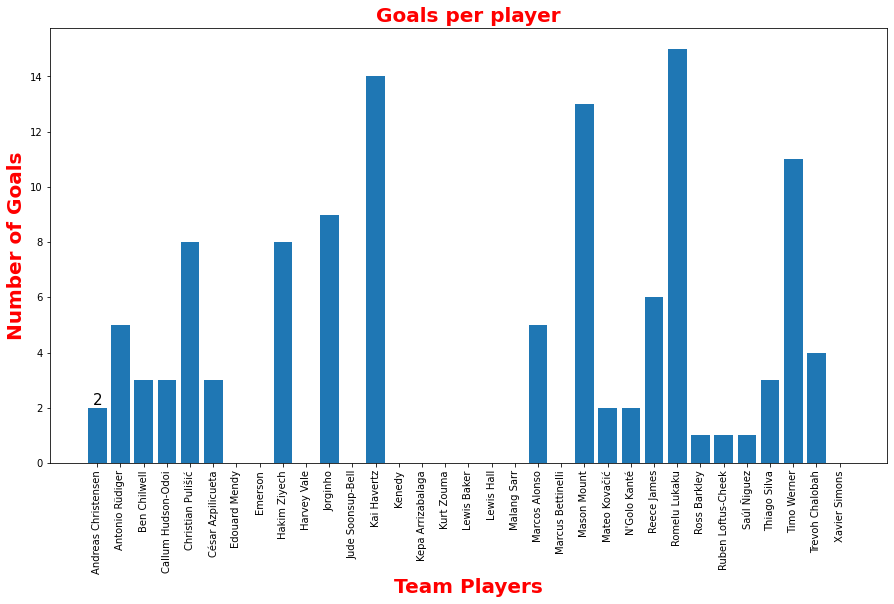

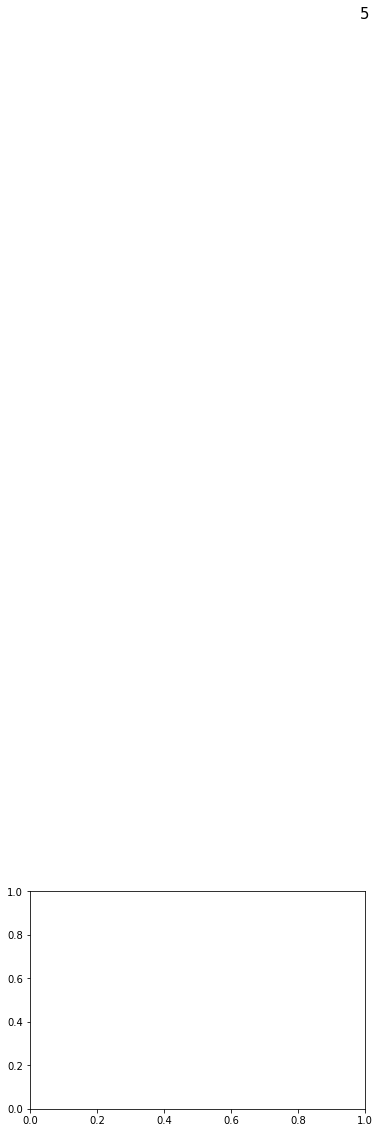

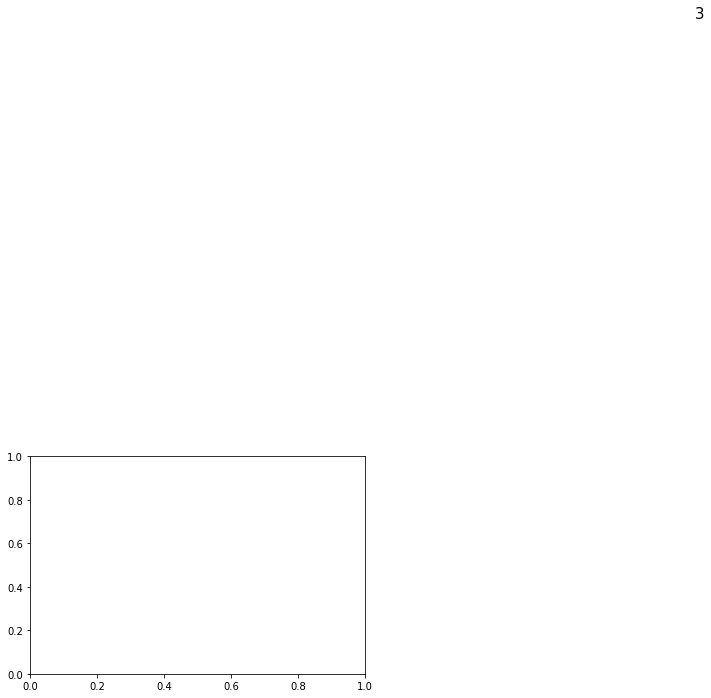

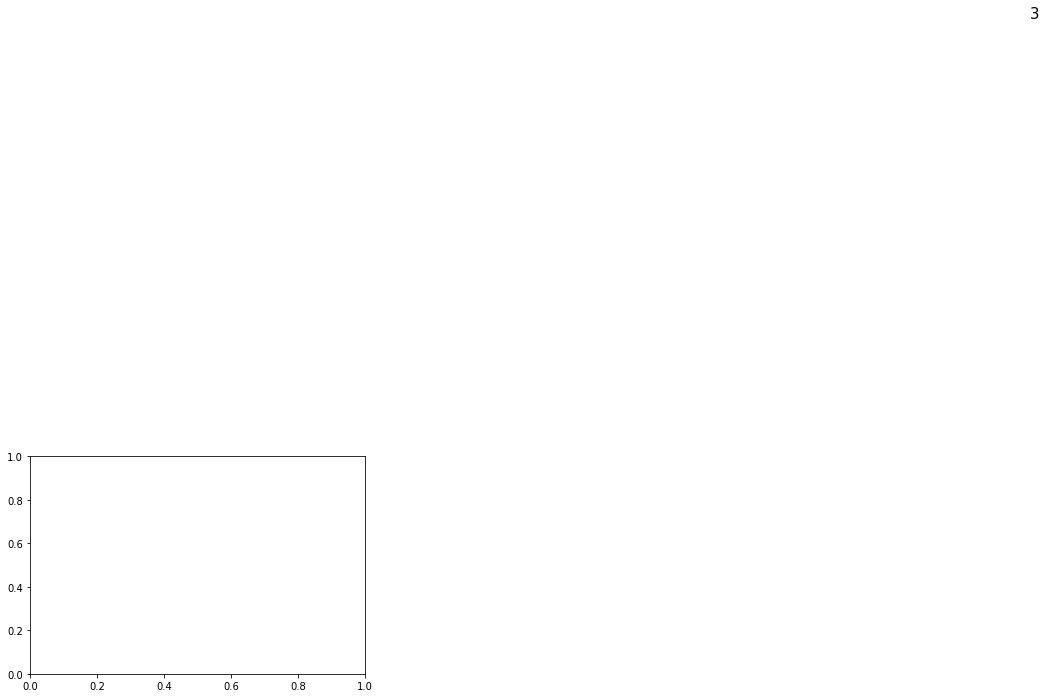

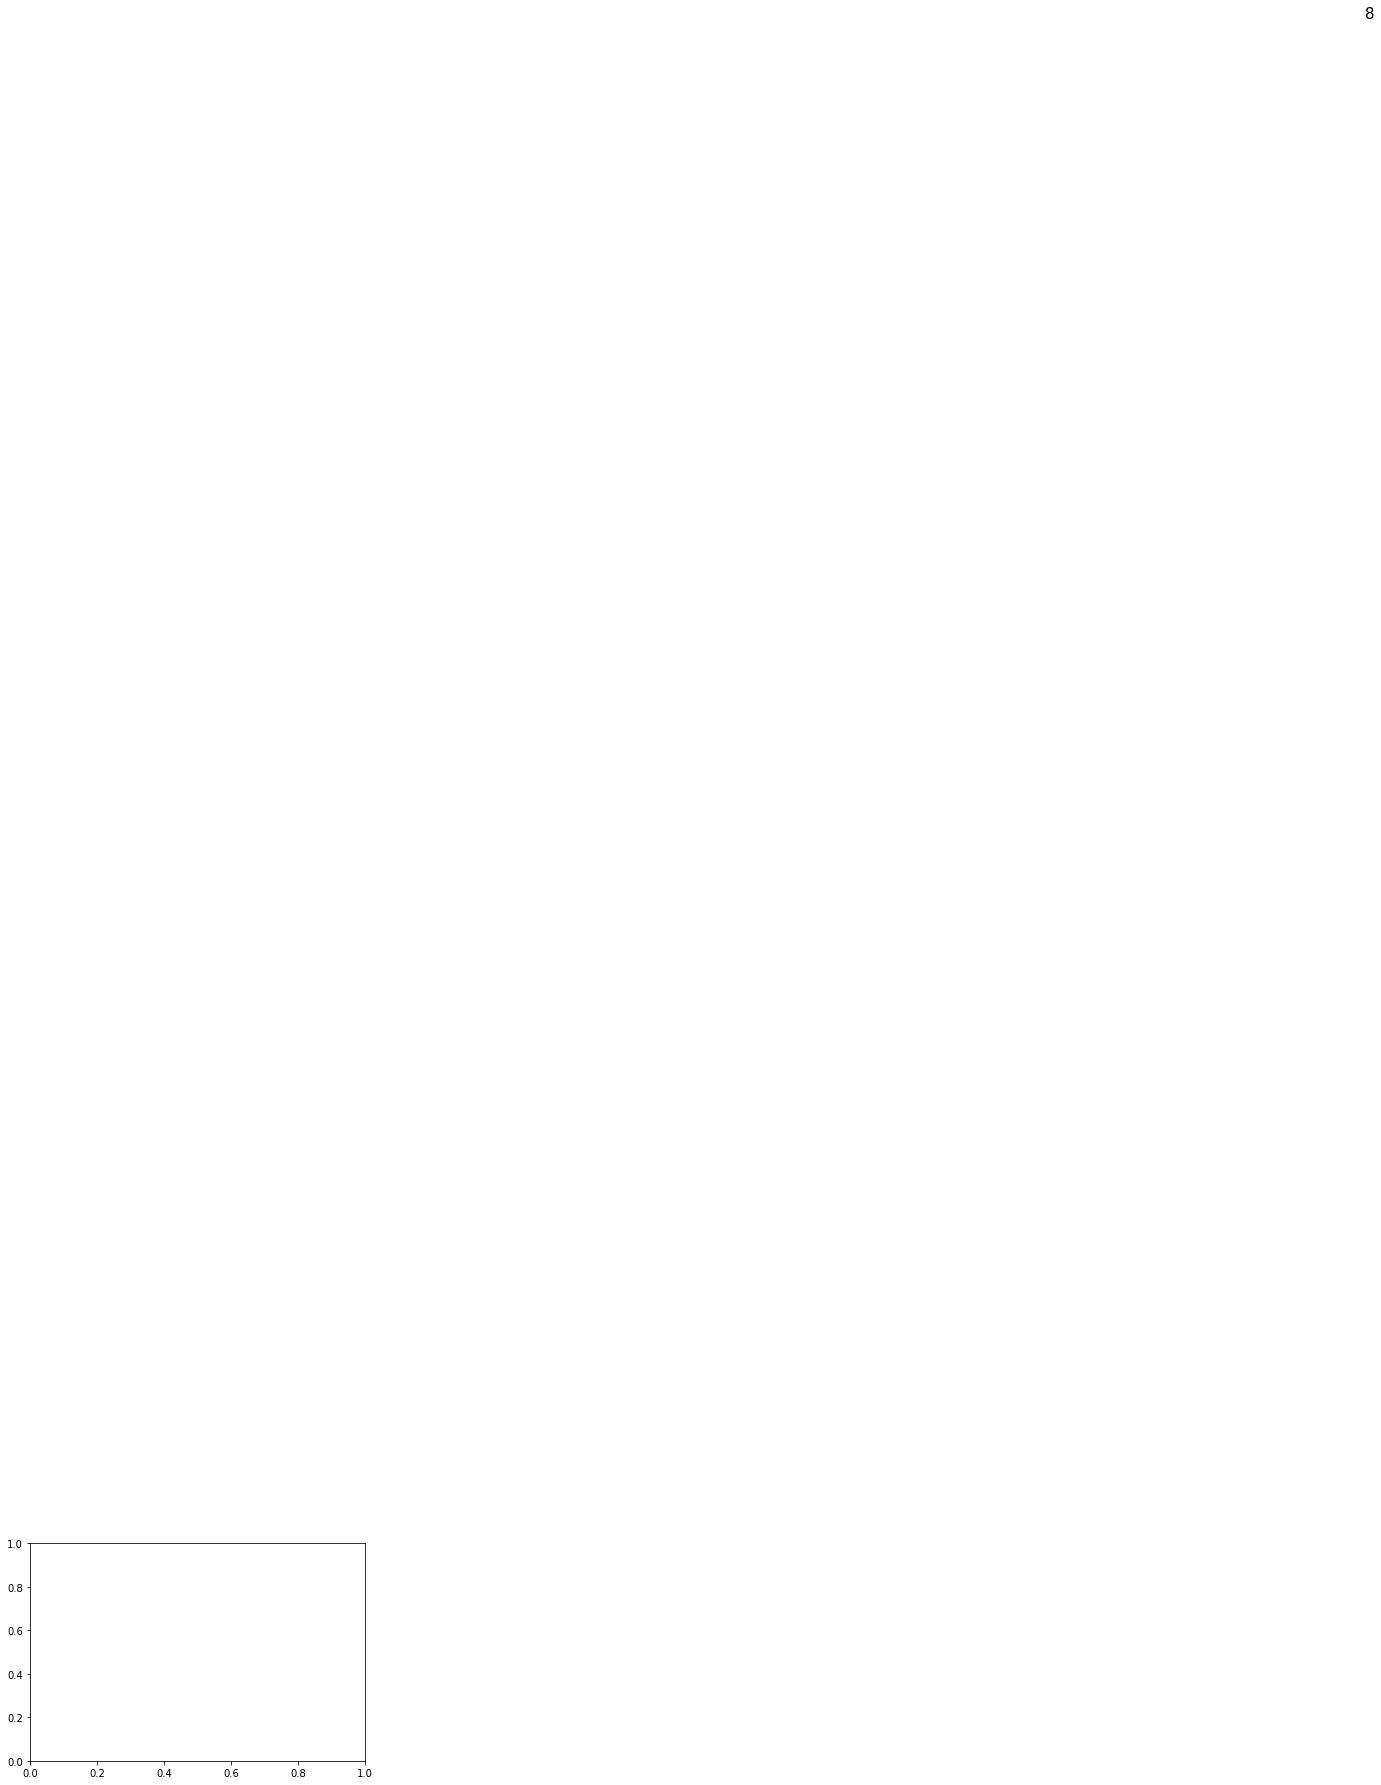

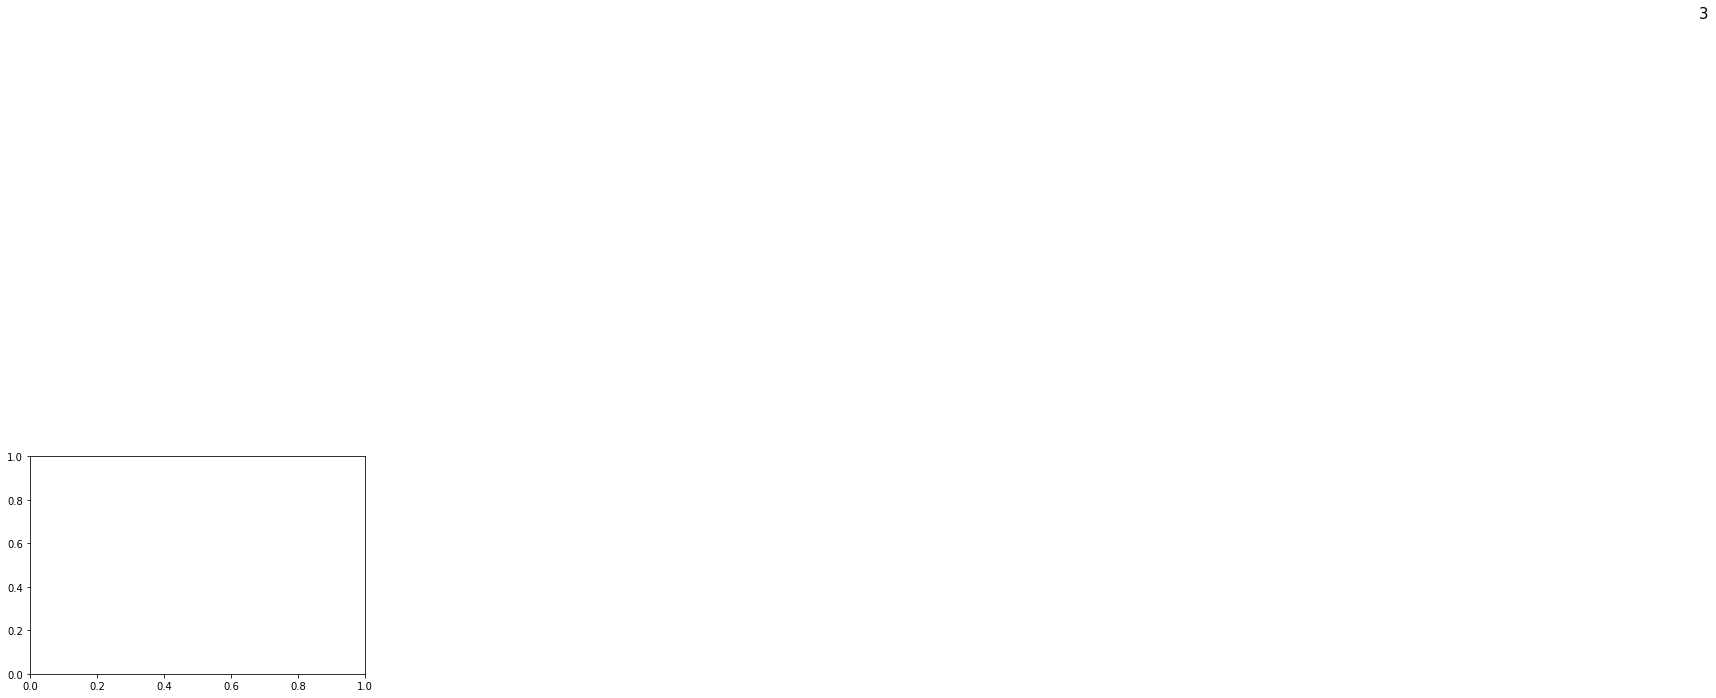

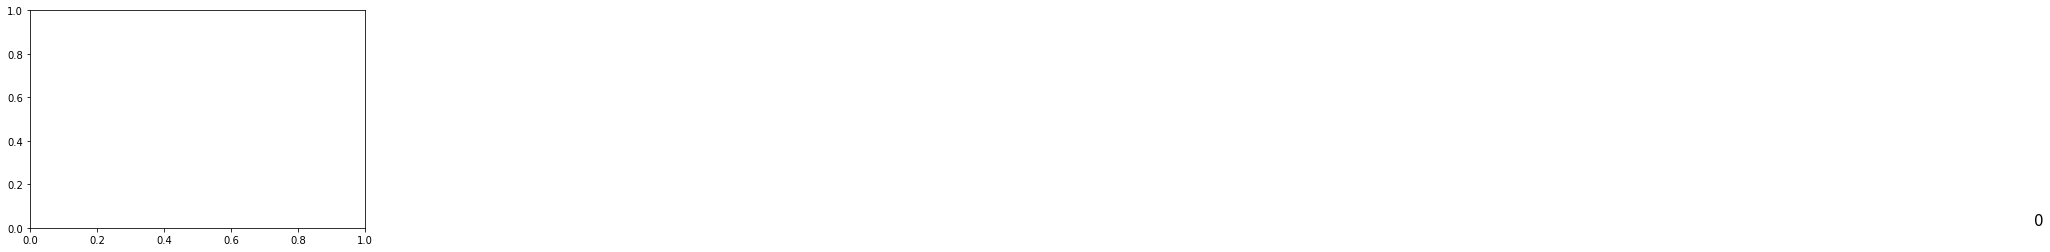

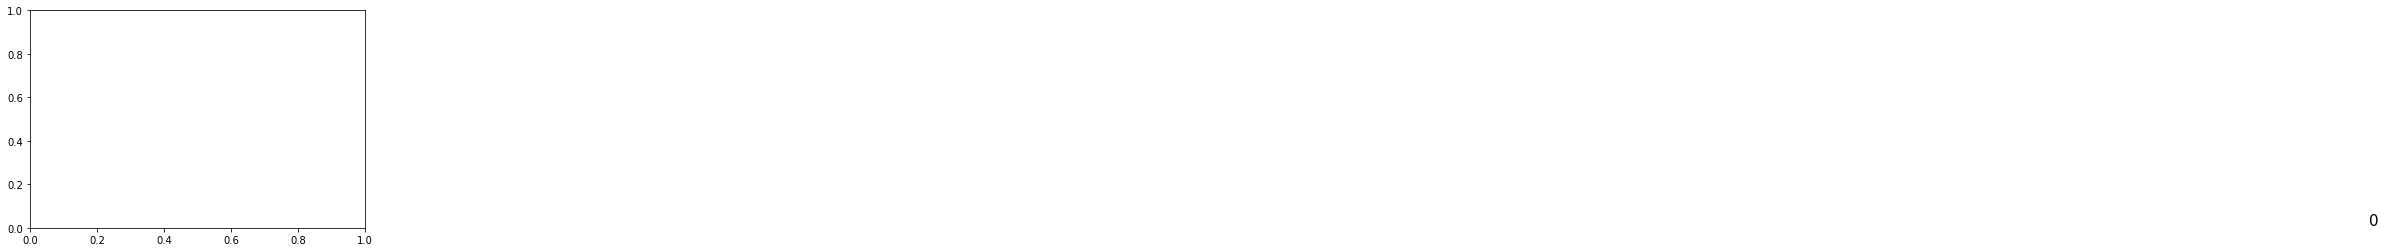

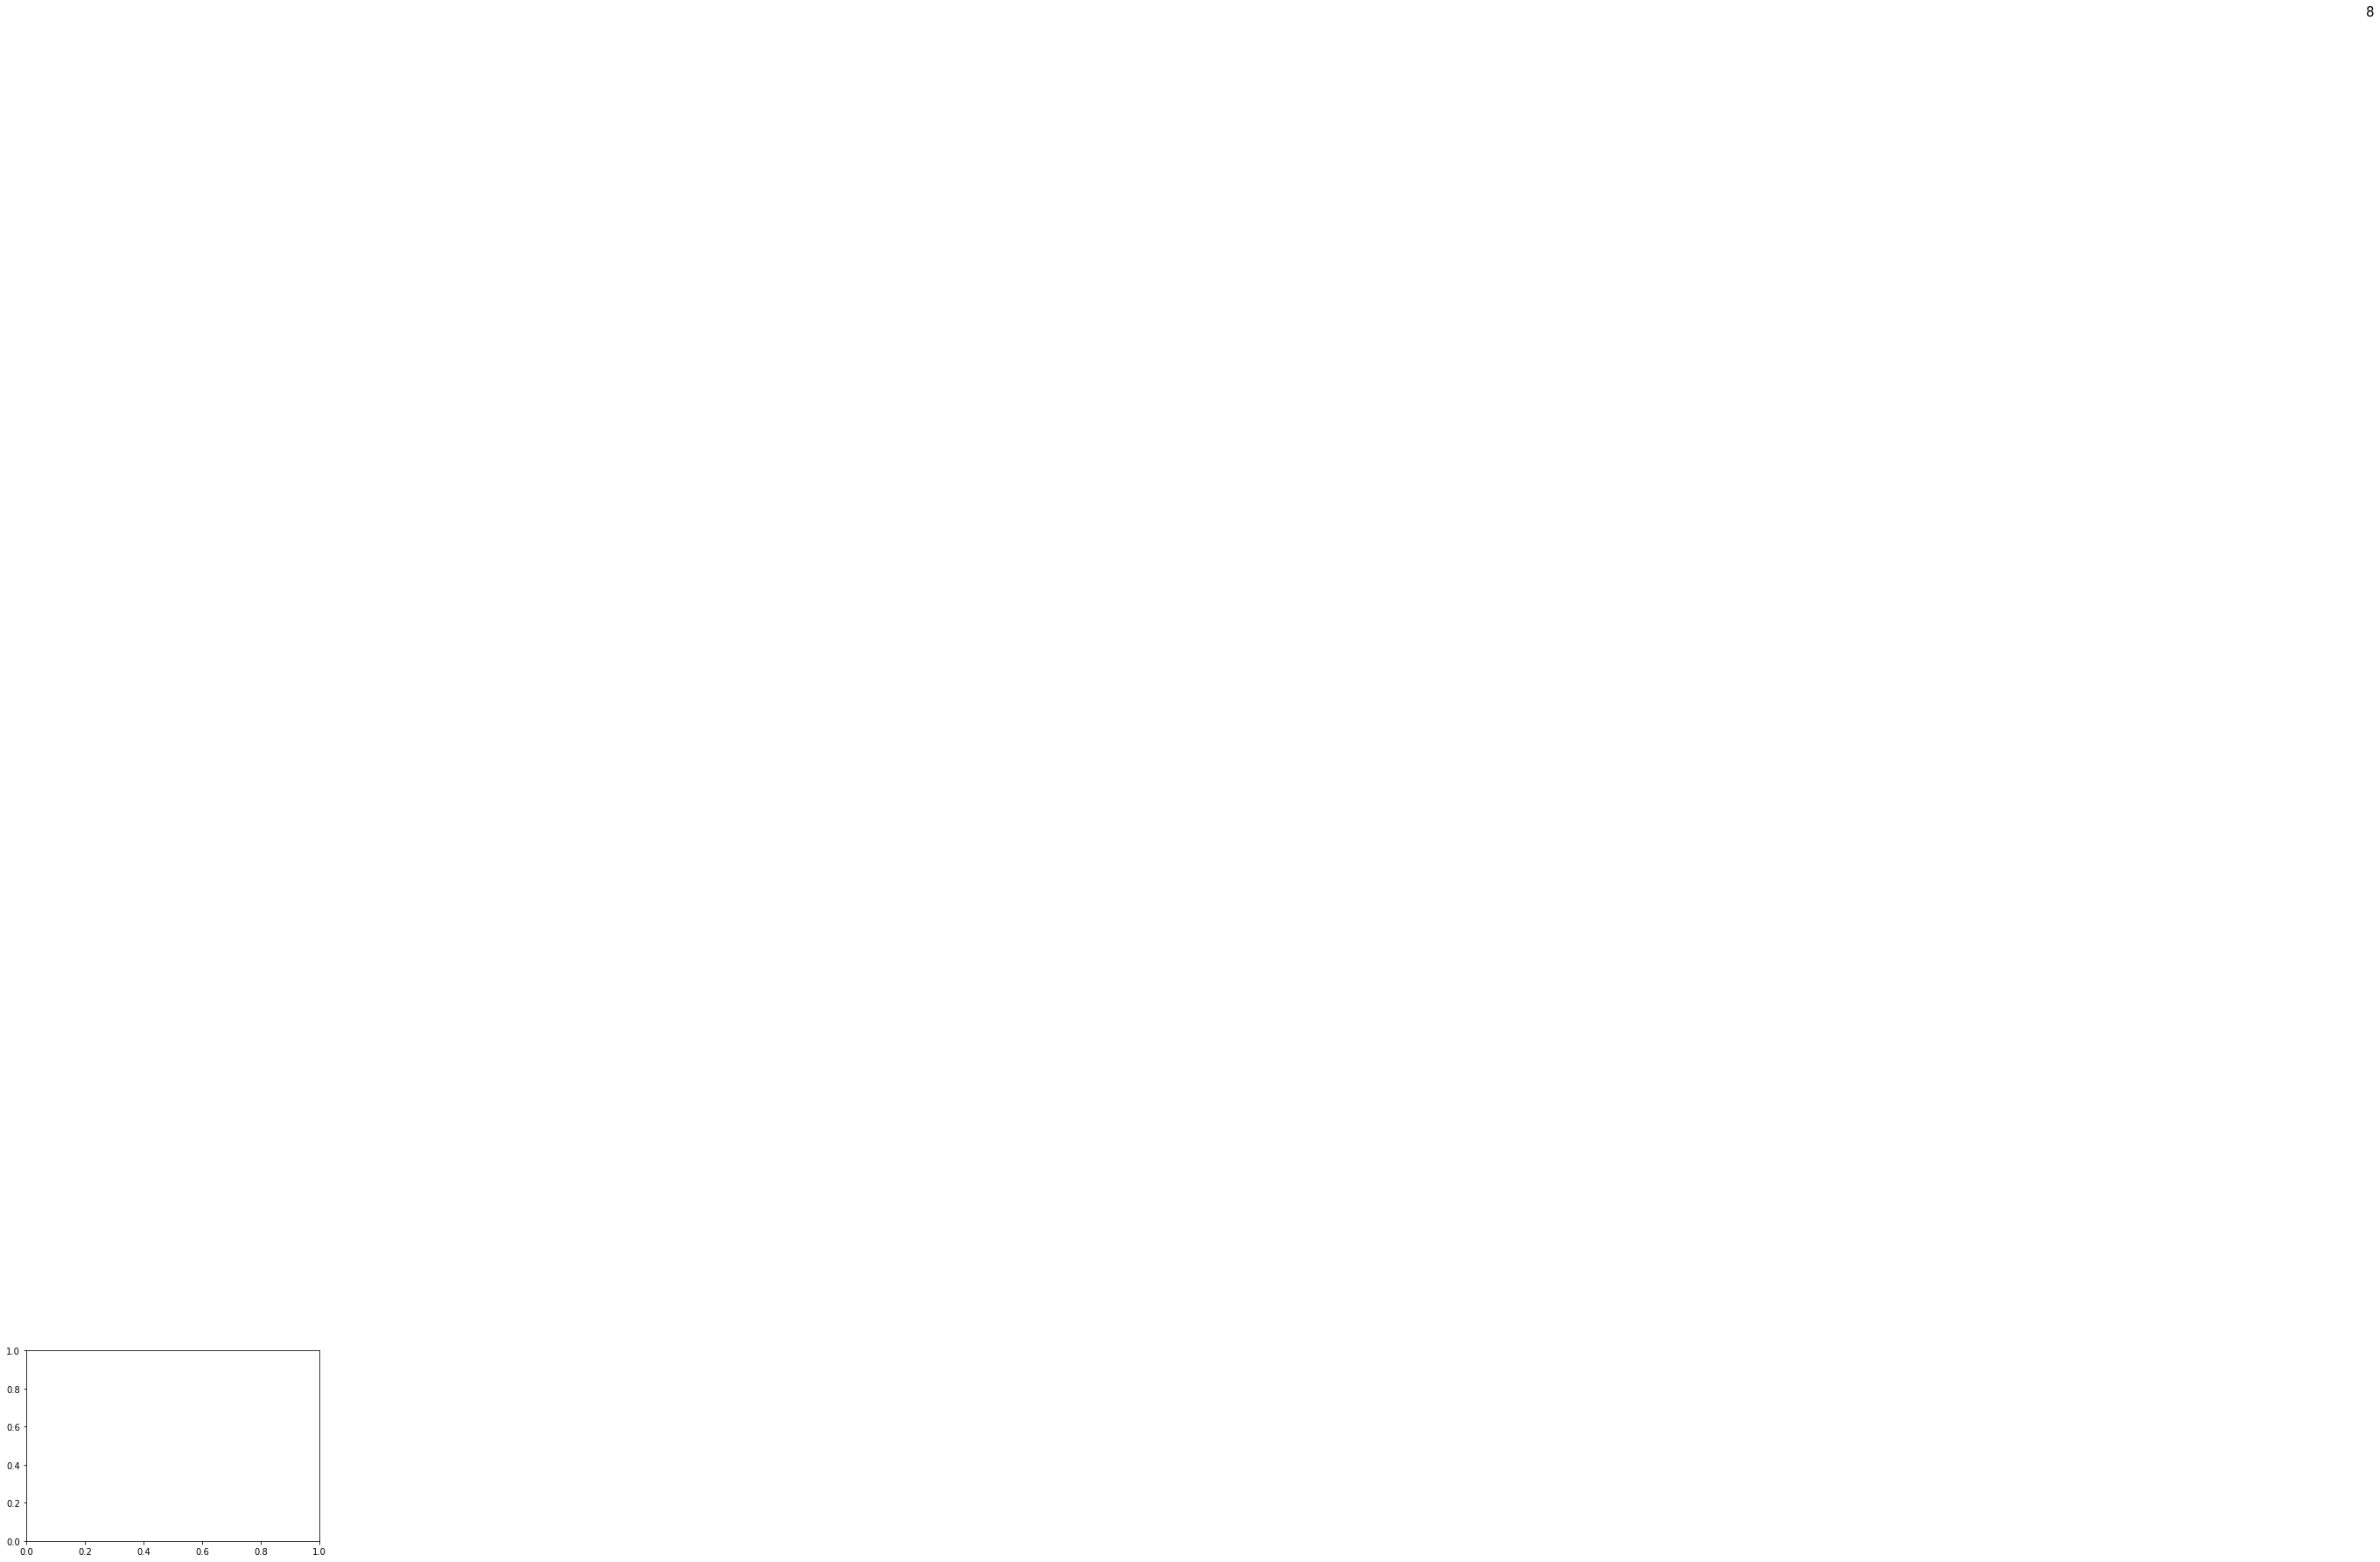

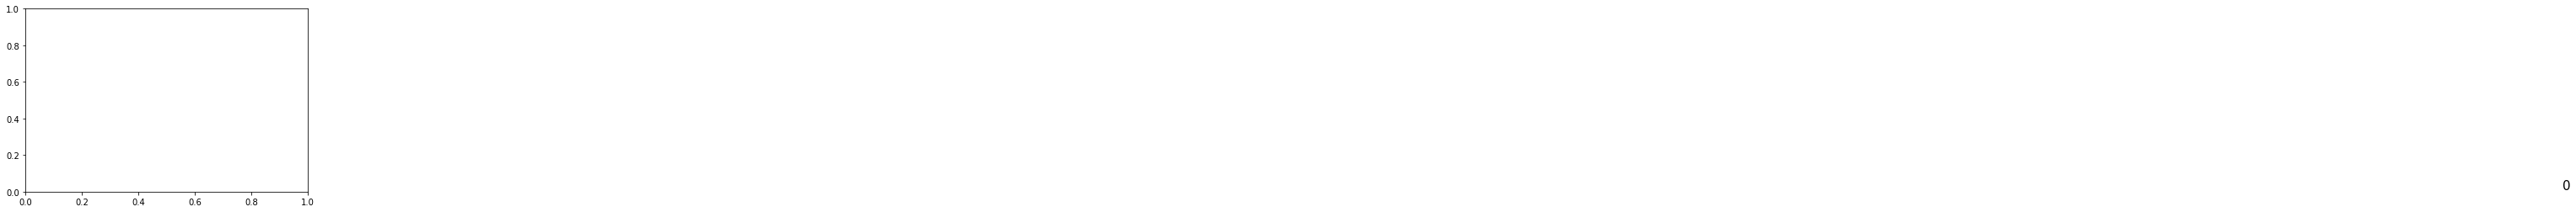

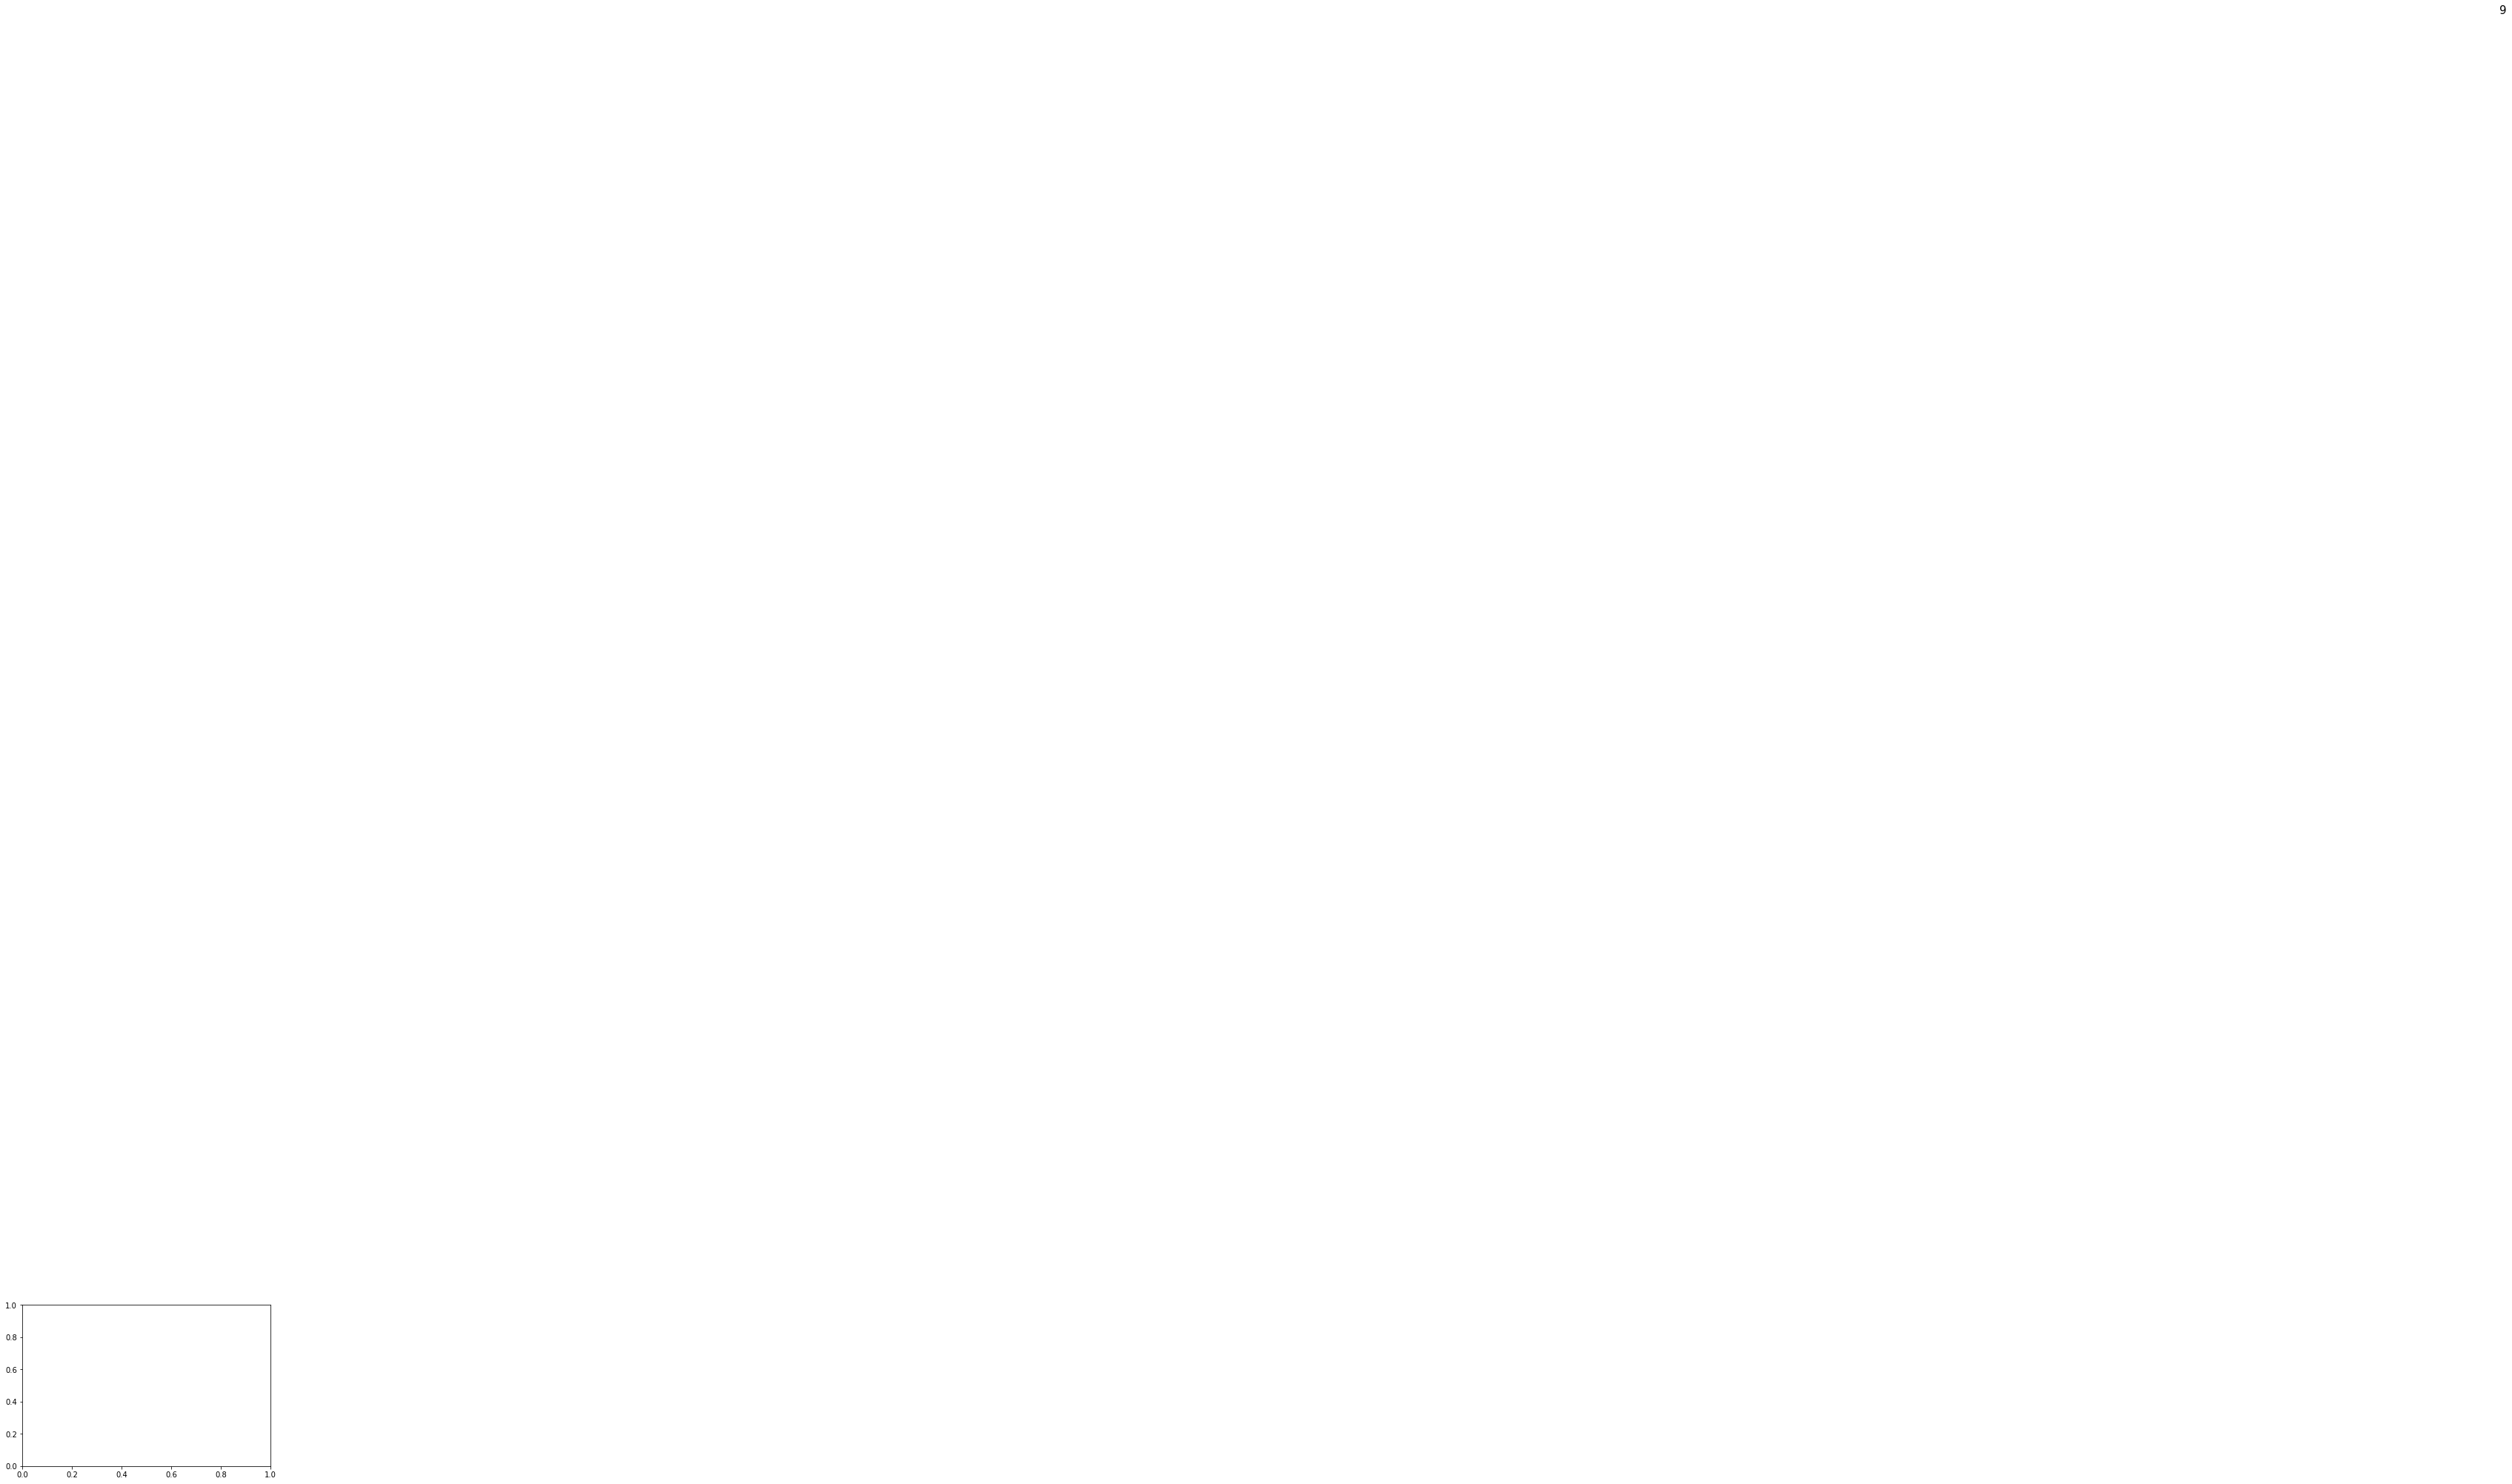

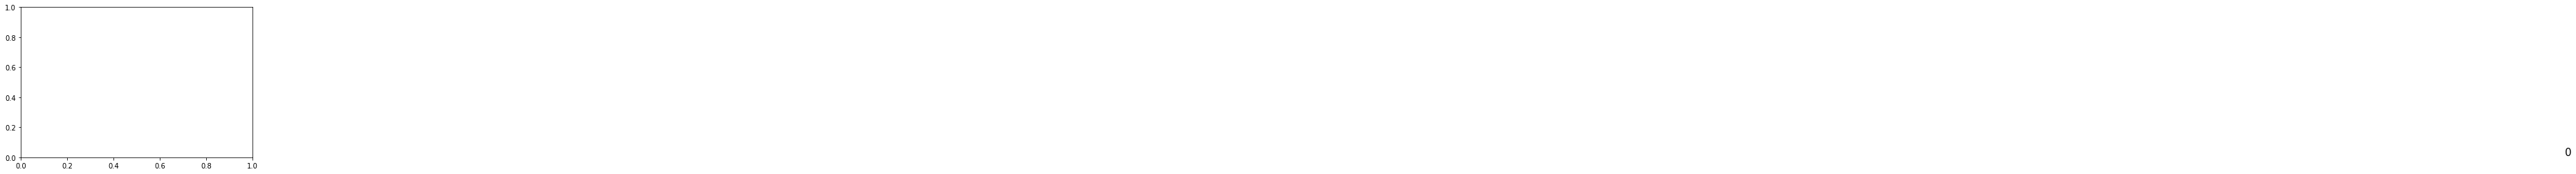

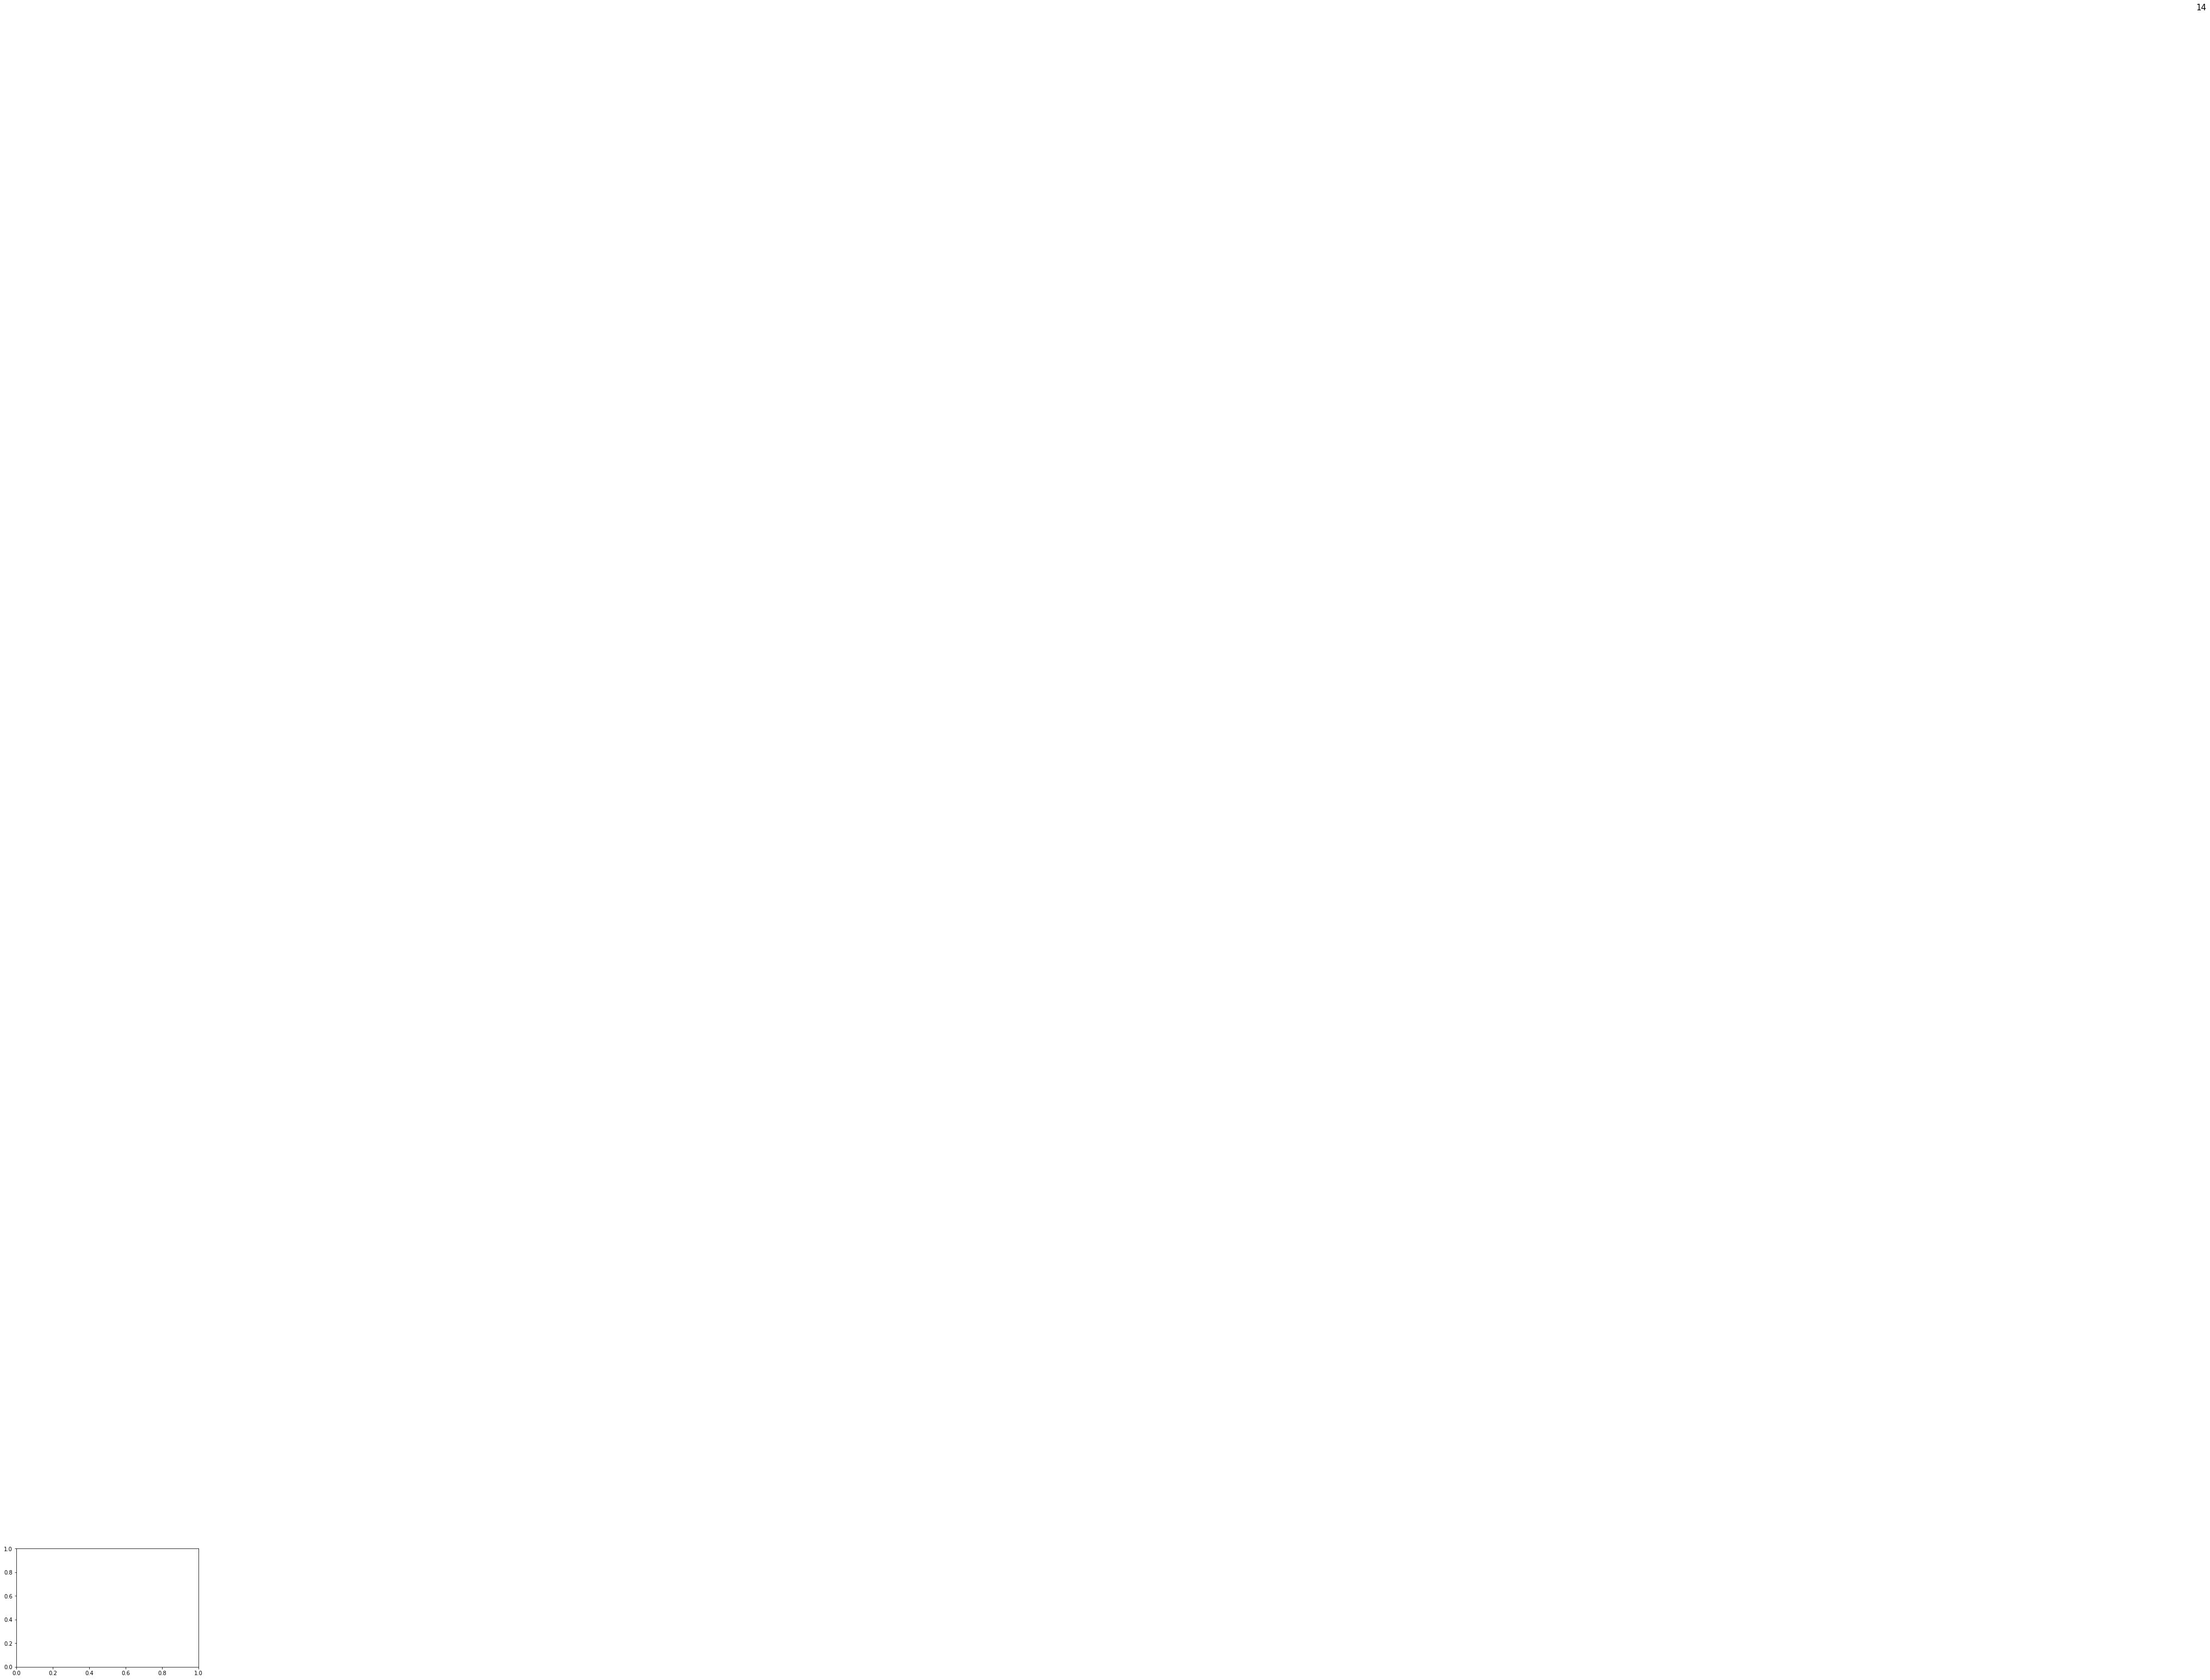

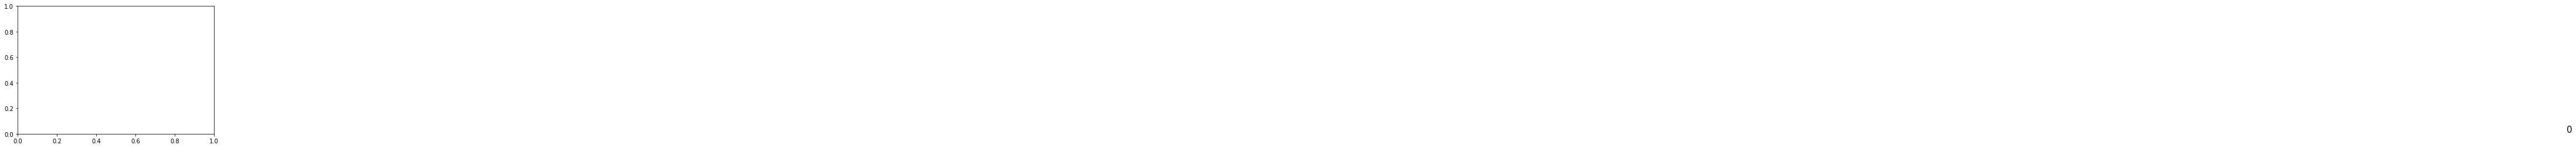

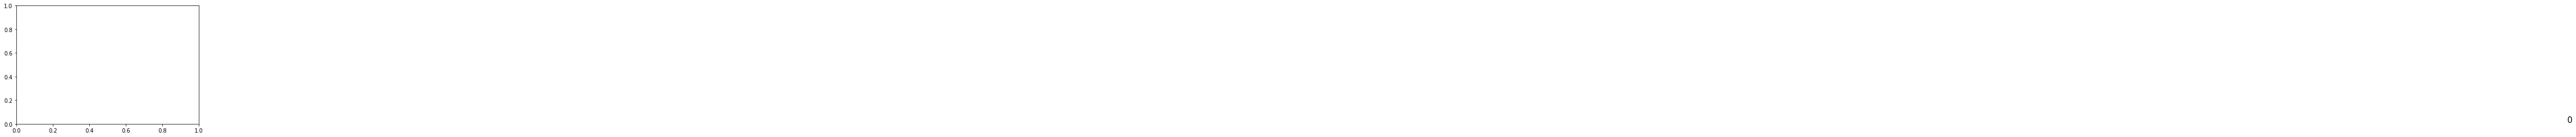

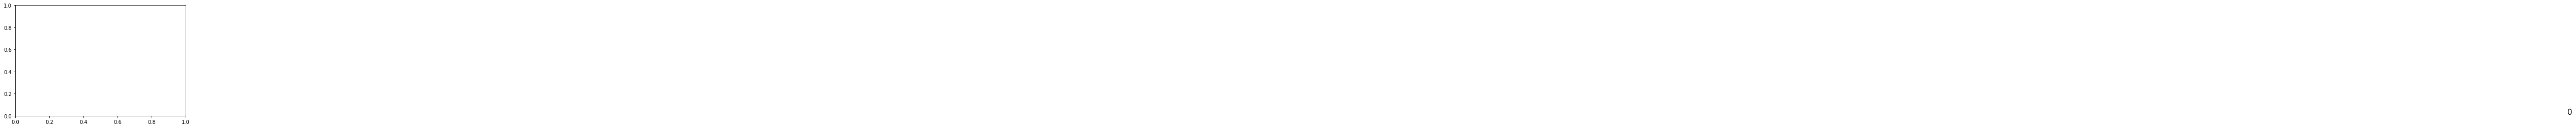

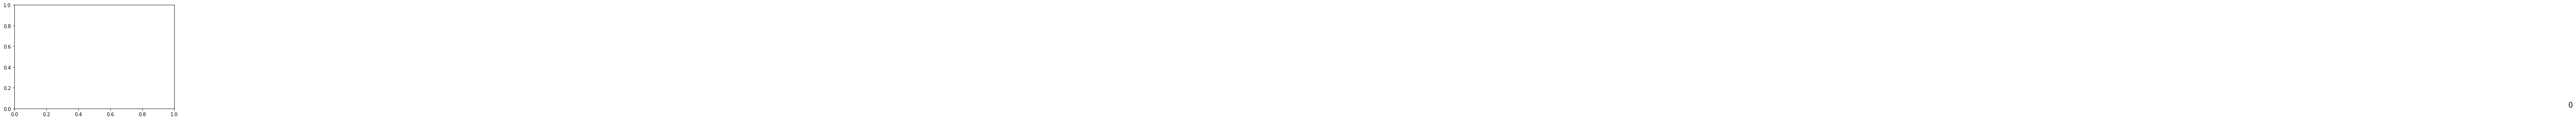

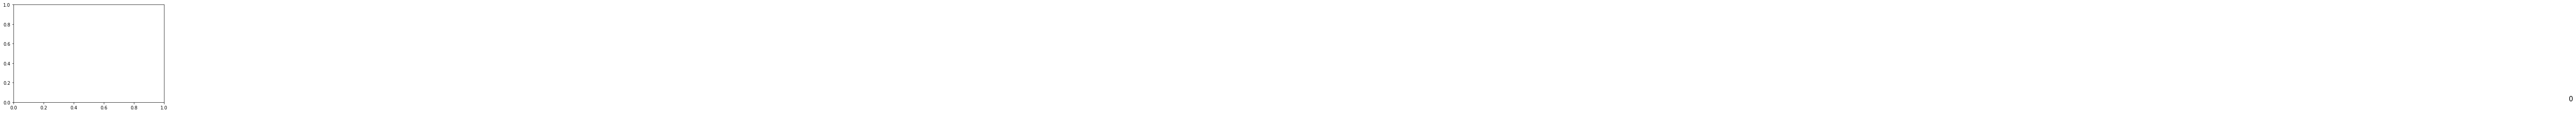

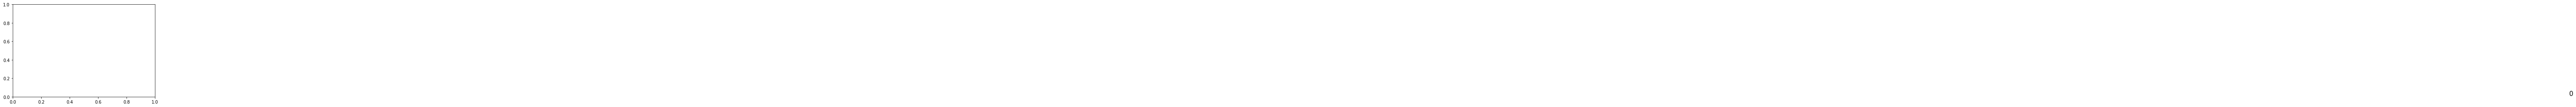

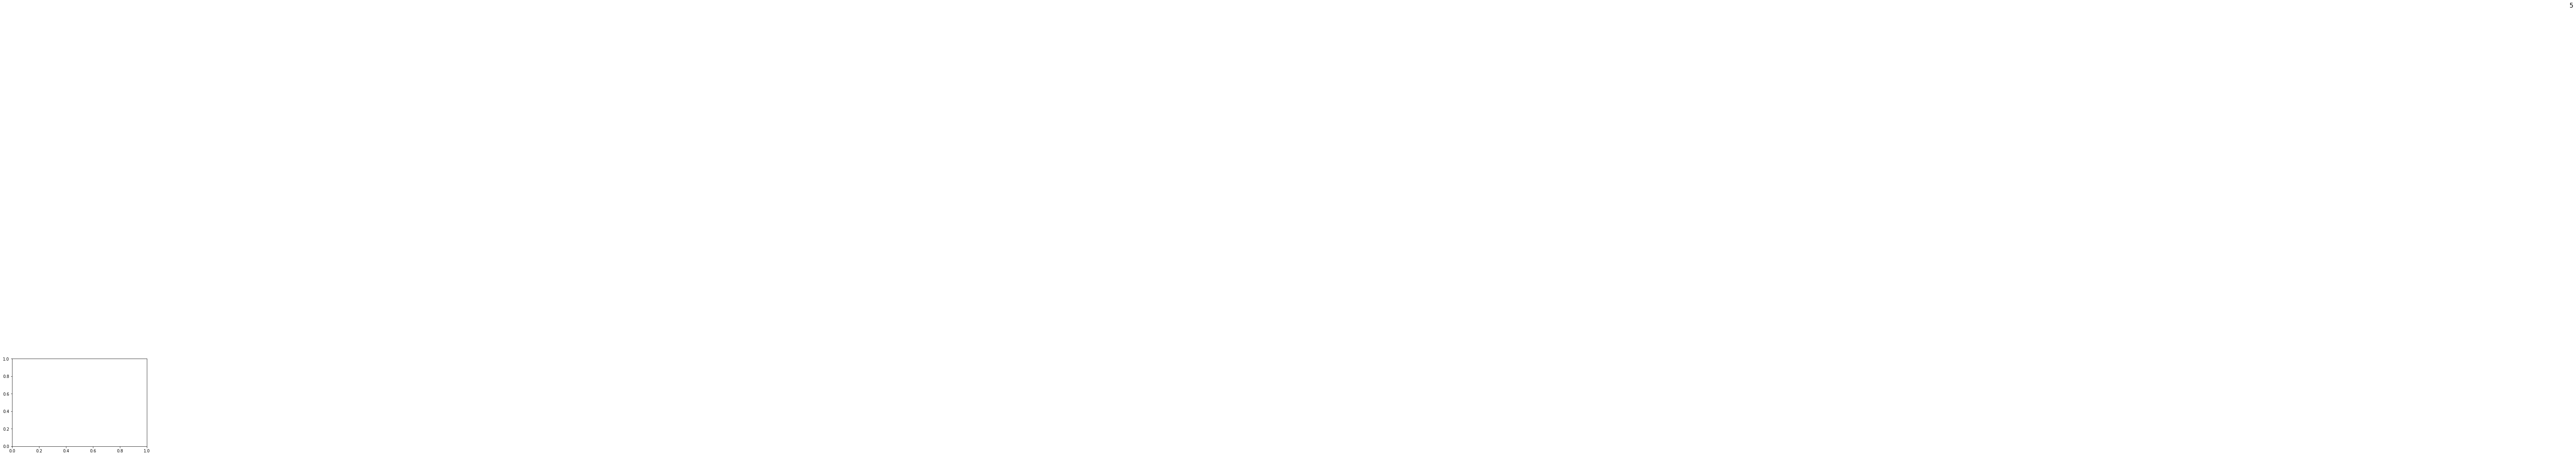

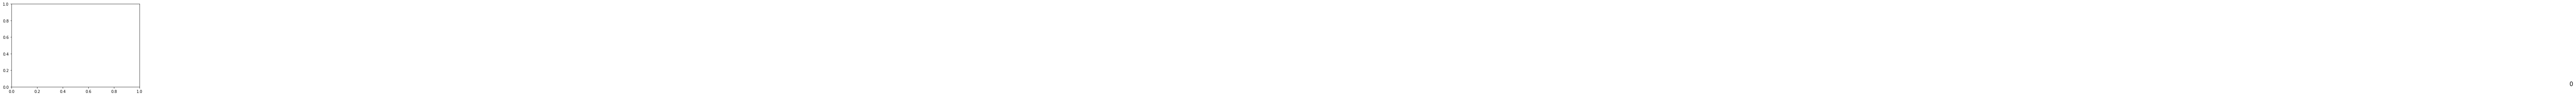

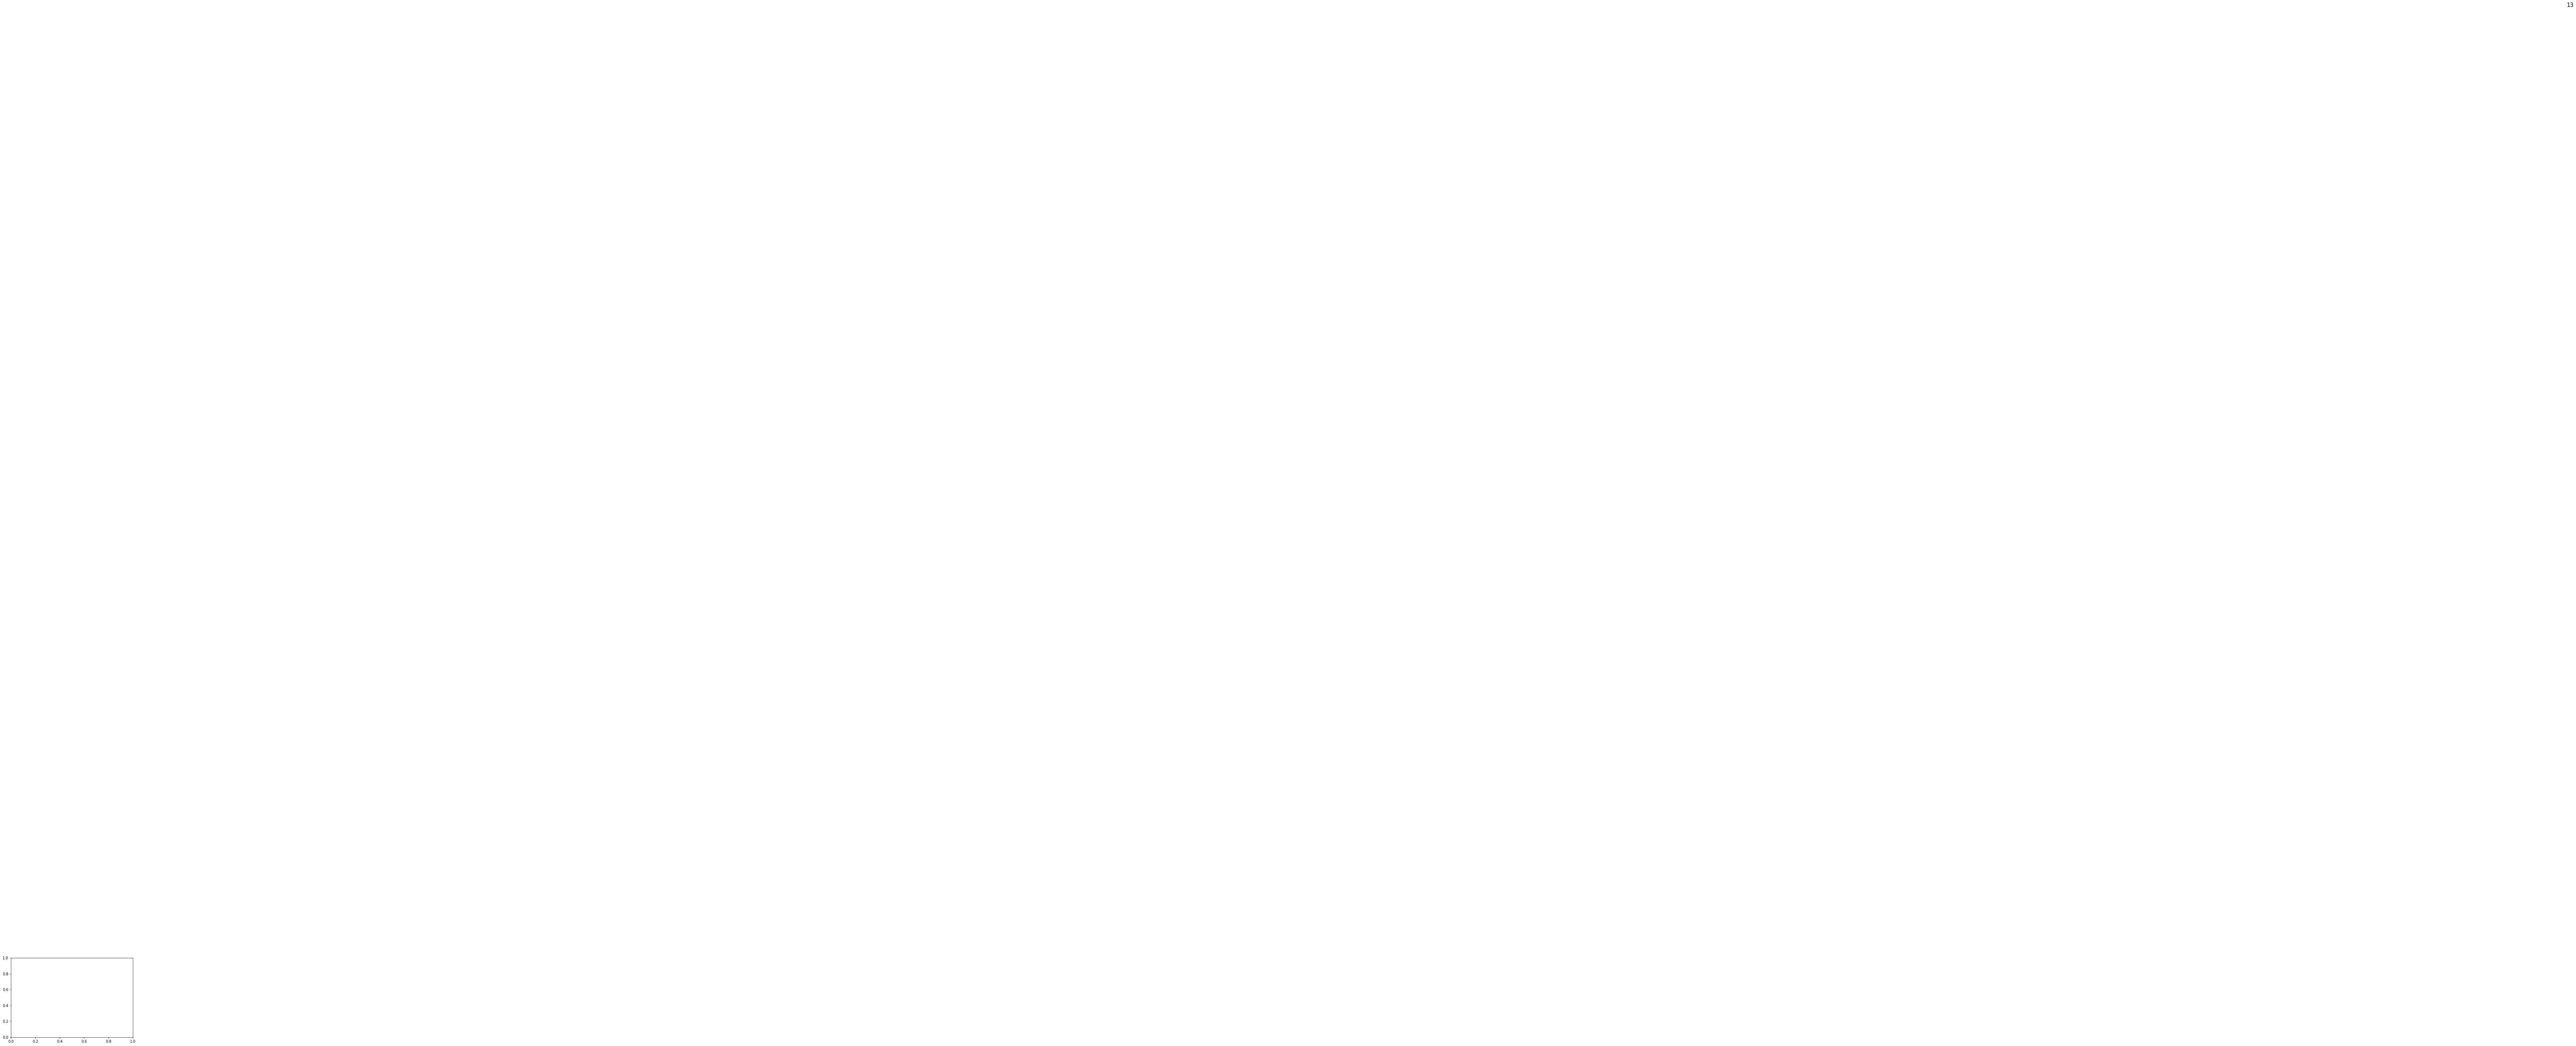

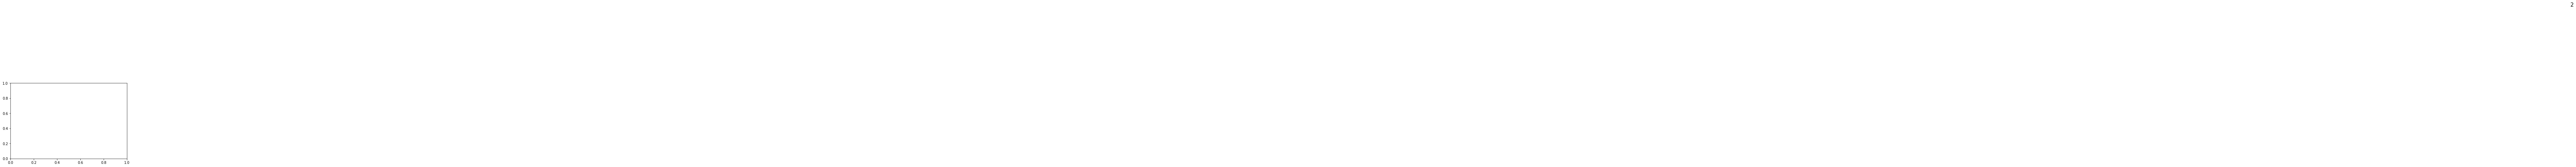

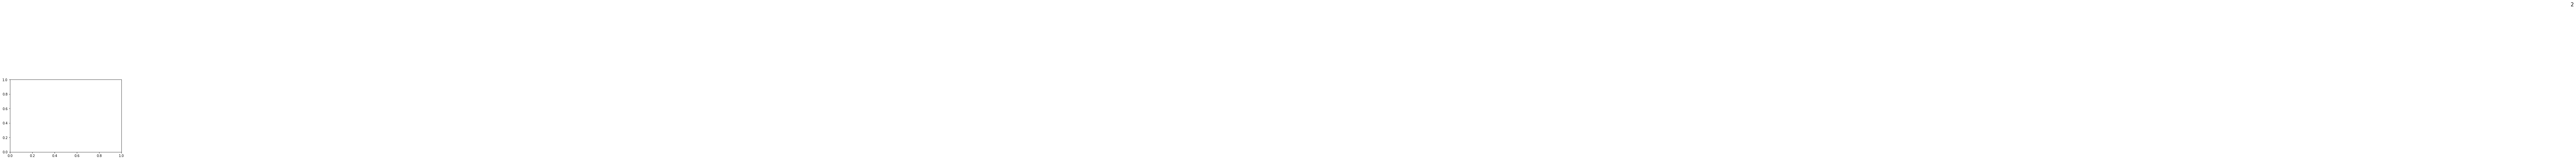

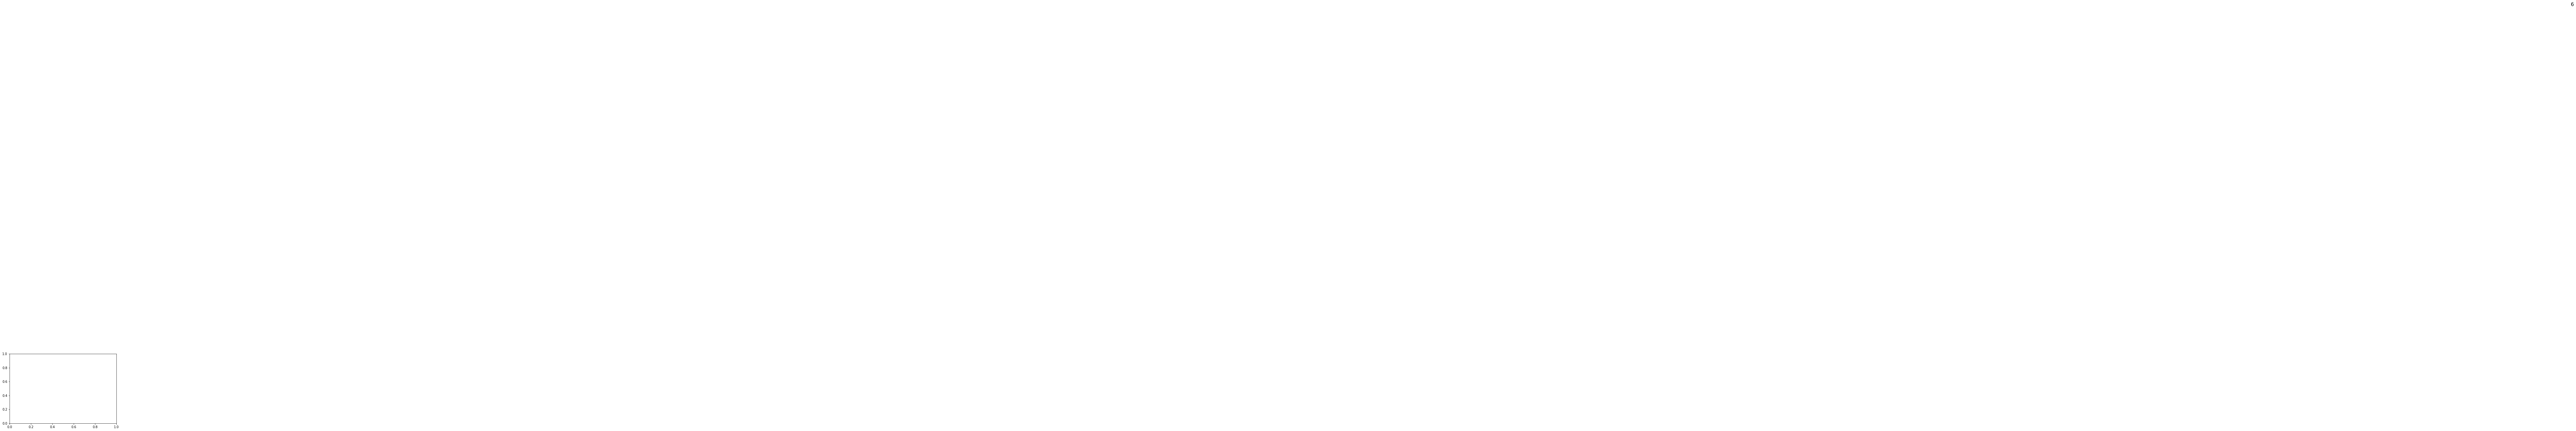

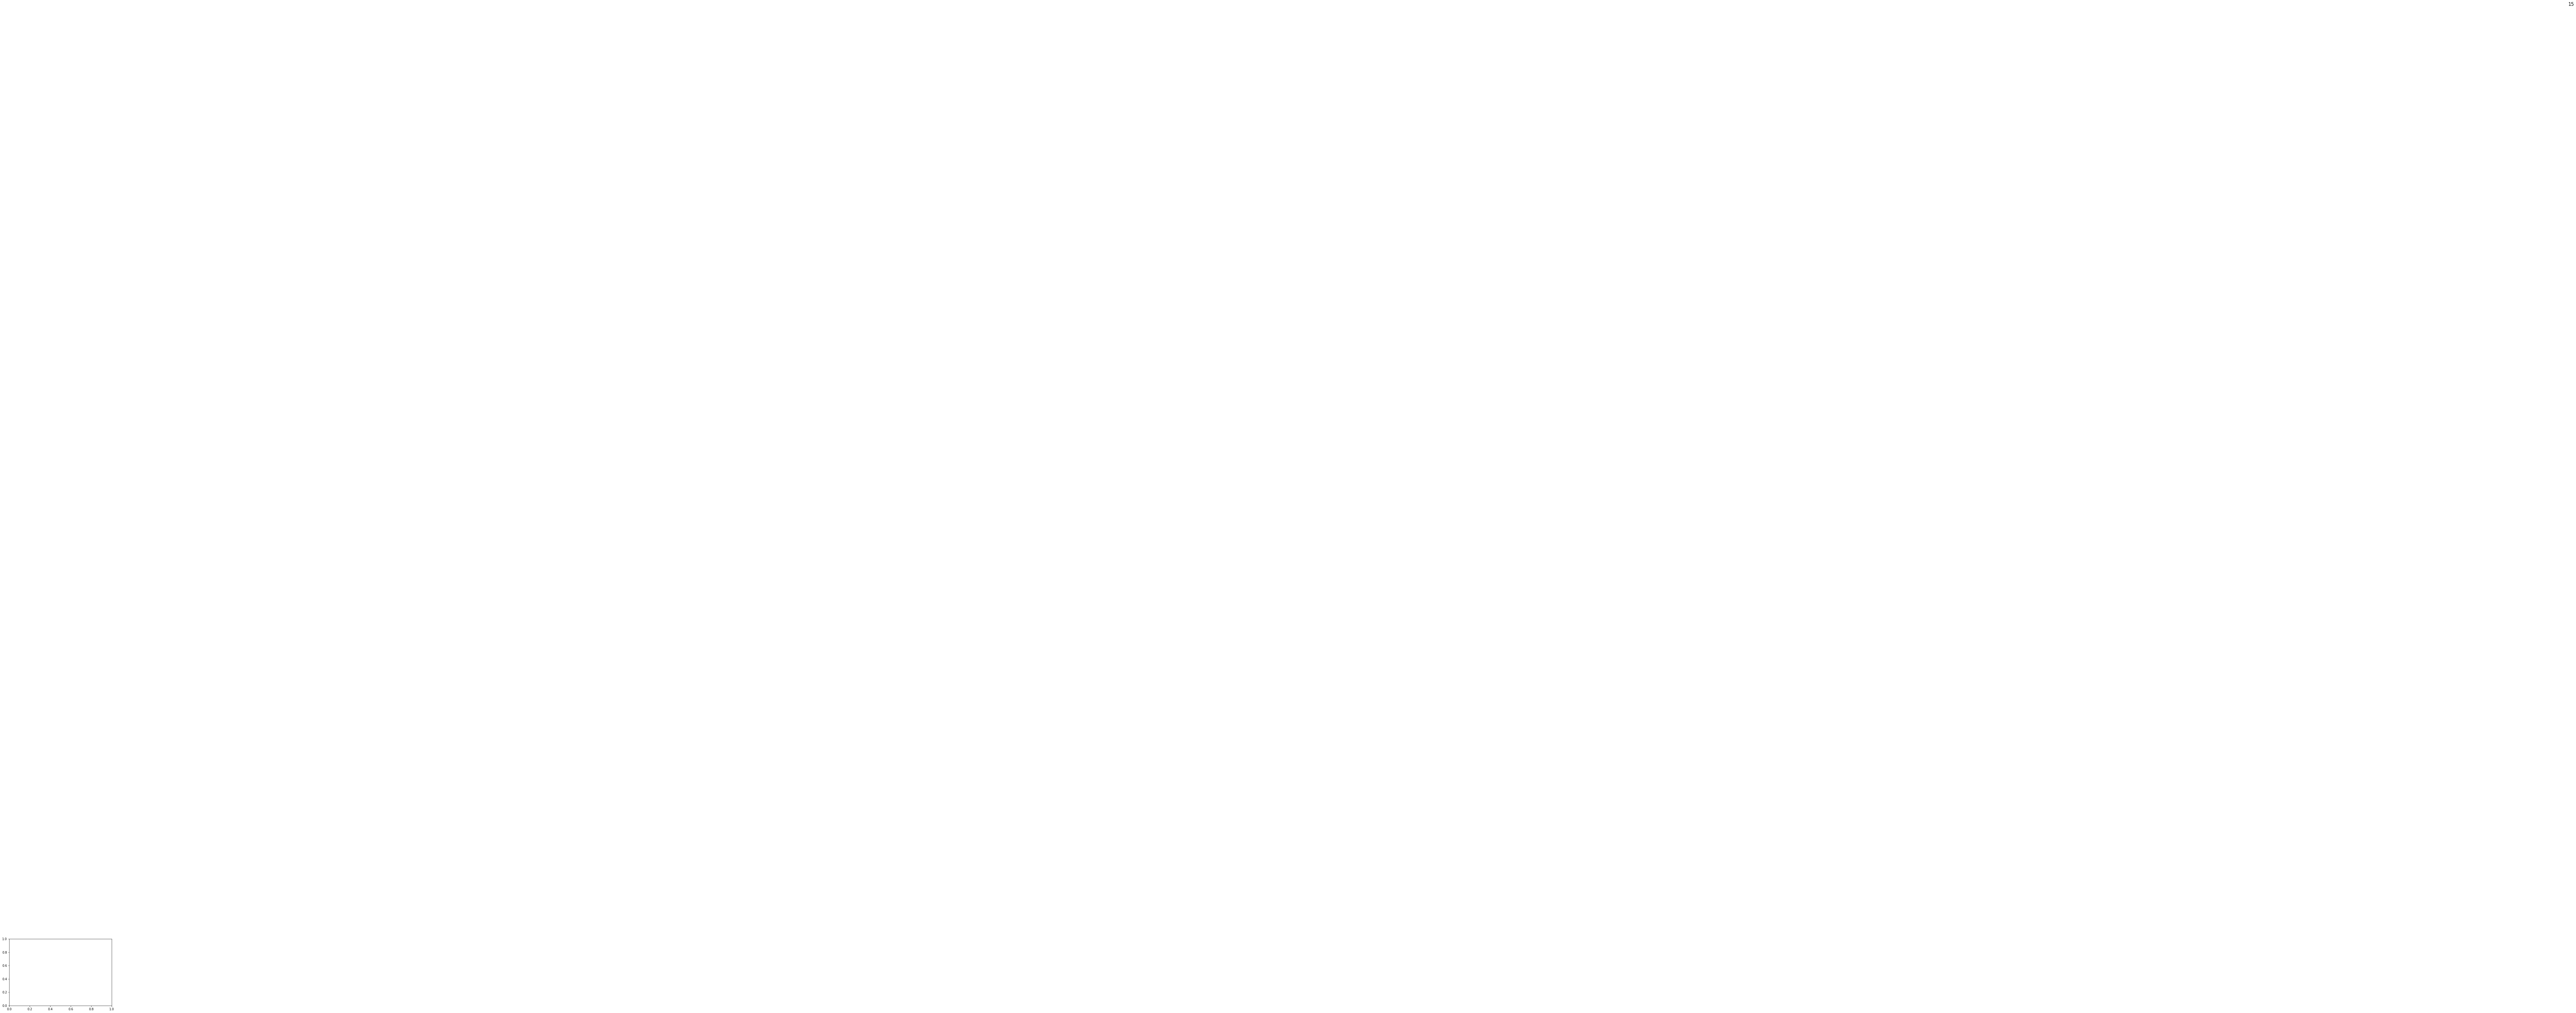

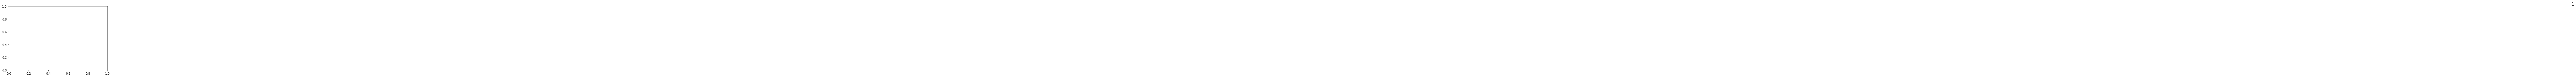

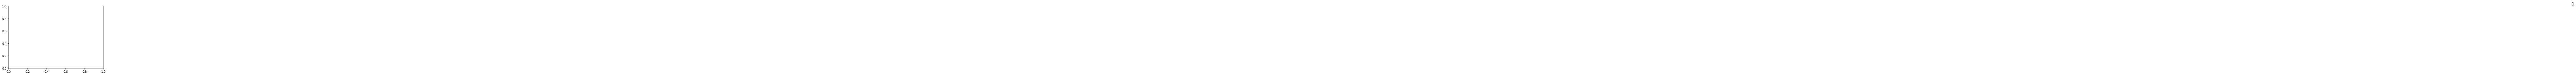

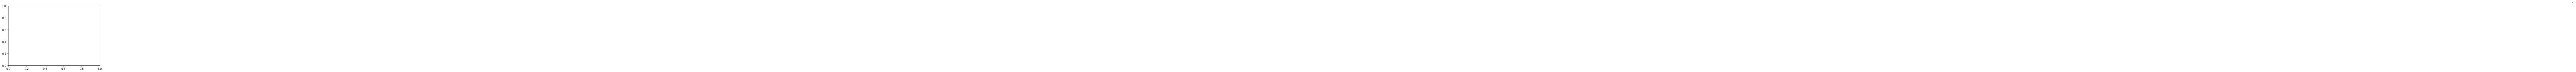

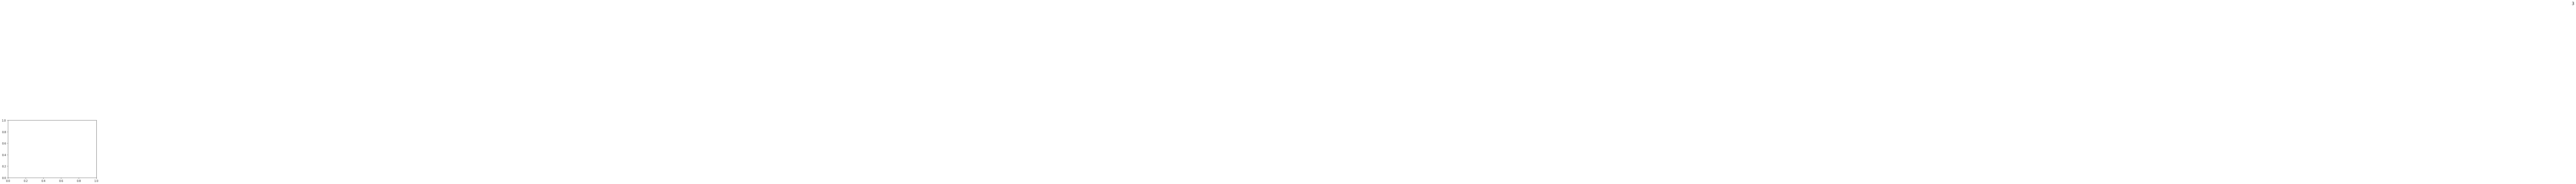

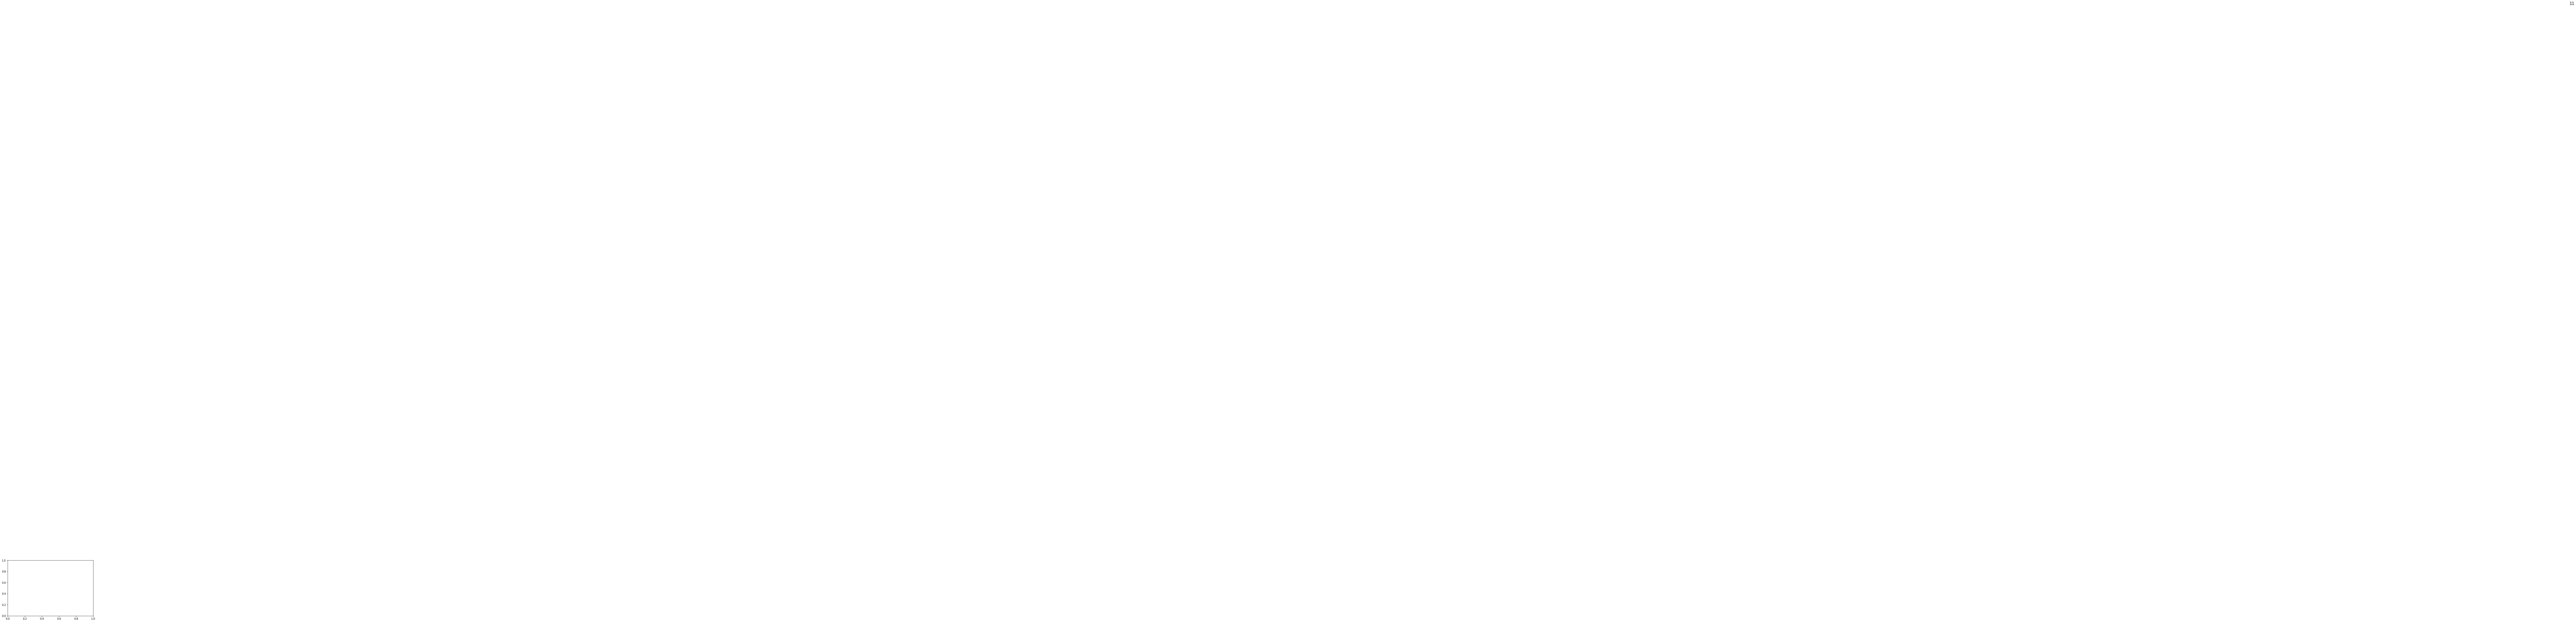

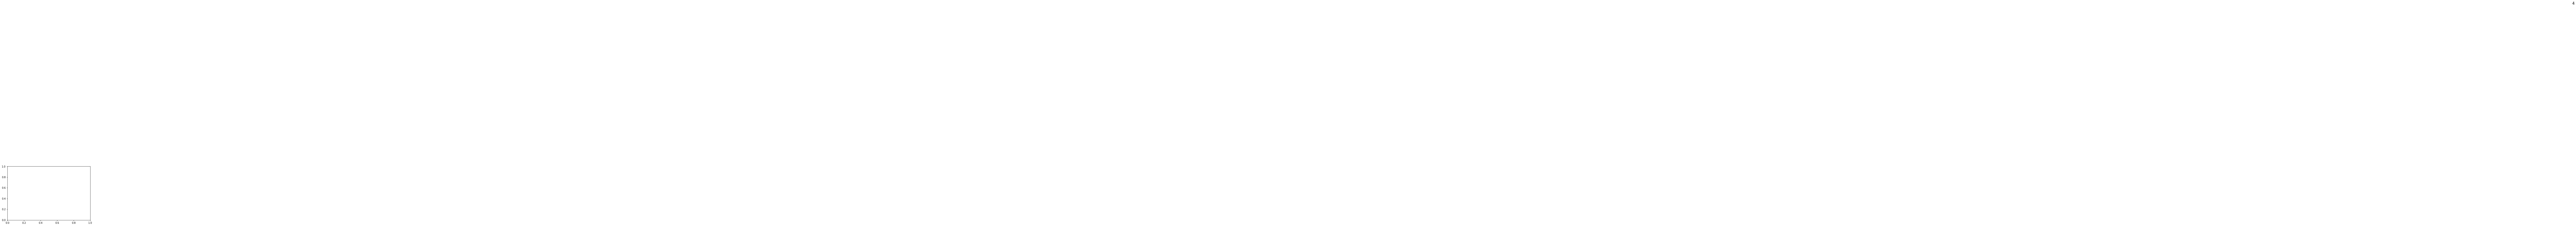

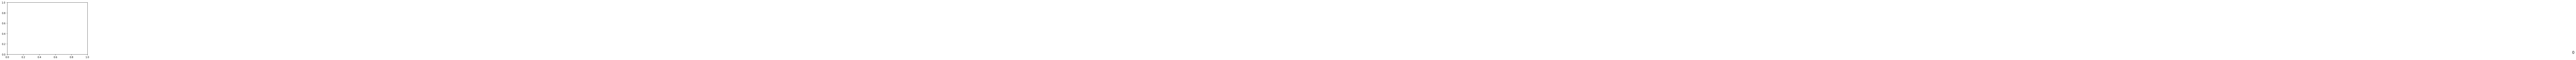

In [19]:
plt.figure(figsize = (15, 8));
plt.bar(x = index, height = values)

plt.title("Goals per player", fontsize = 20, color = "red", fontweight = "bold")
plt.xlabel("Team Players", fontsize = 20, color = "red", fontweight = "bold")
plt.ylabel("Number of Goals", fontsize = 20, color = "red", fontweight = "bold")
plt.xticks(rotation = 90)

for i in range(len(index)):
    plt.text(i, values[i], values[i], ha = "center", va = "bottom", fontsize = 15)
    
    plt.show()

## Subsetting

In [20]:
Chelsea[["RedCards", "Player"]]

,RedCards,Player
155,0.0,César Azpilicueta
156,0.0,Lewis Baker
157,0.0,Ross Barkley
158,0.0,Marcus Bettinelli
159,0.0,Trevoh Chalobah
160,0.0,Ben Chilwell
161,0.0,Andreas Christensen
162,0.0,Emerson
163,0.0,Lewis Hall
164,0.0,Kai Havertz


In [21]:
Chelsea["Apearances"].max()

54

In [22]:
Chelsea["Goals"].max()

15

In [24]:
df.columns

Index(['Team', 'JerseyNo', 'Player', 'Position', 'Apearances', 'Substitutions',
       'Goals', 'Penalties', 'YellowCards', 'RedCards'],
      dtype='object')

In [25]:
Chelsea.loc[:,["Player", "JerseyNo", "Position", "Goals"]]

,Player,JerseyNo,Position,Goals
155,César Azpilicueta,28,Defender/Midfielder,3
156,Lewis Baker,34,Midfielder,0
157,Ross Barkley,18,Midfielder,1
158,Marcus Bettinelli,13,Goalkeeper,0
159,Trevoh Chalobah,14,Defender,4
160,Ben Chilwell,21,Defender,3
161,Andreas Christensen,4,Defender,2
162,Emerson,33,Defender,0
163,Lewis Hall,75,Midfielder,0
164,Kai Havertz,29,Midfielder/Forward,14
